# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

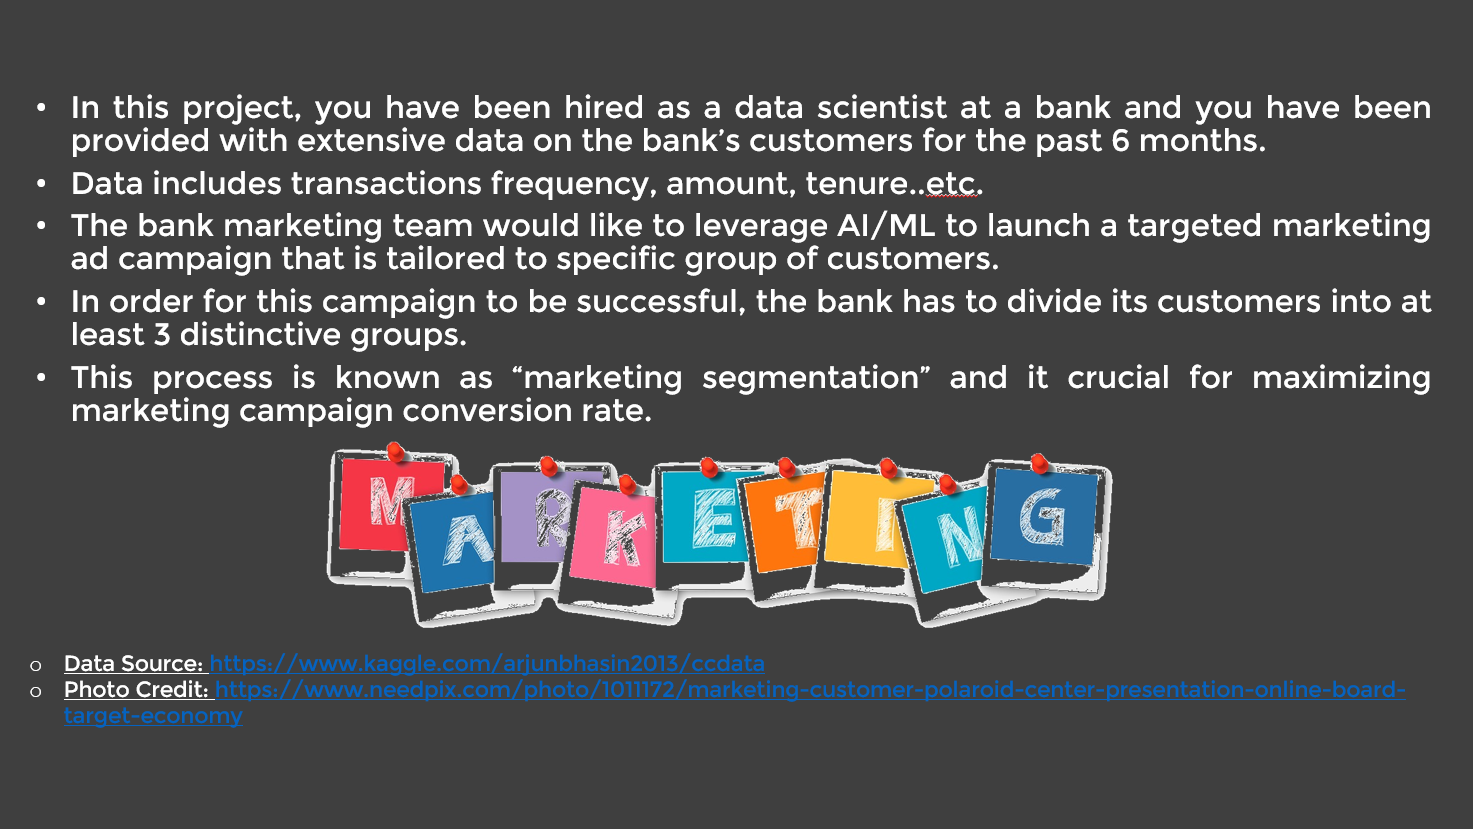

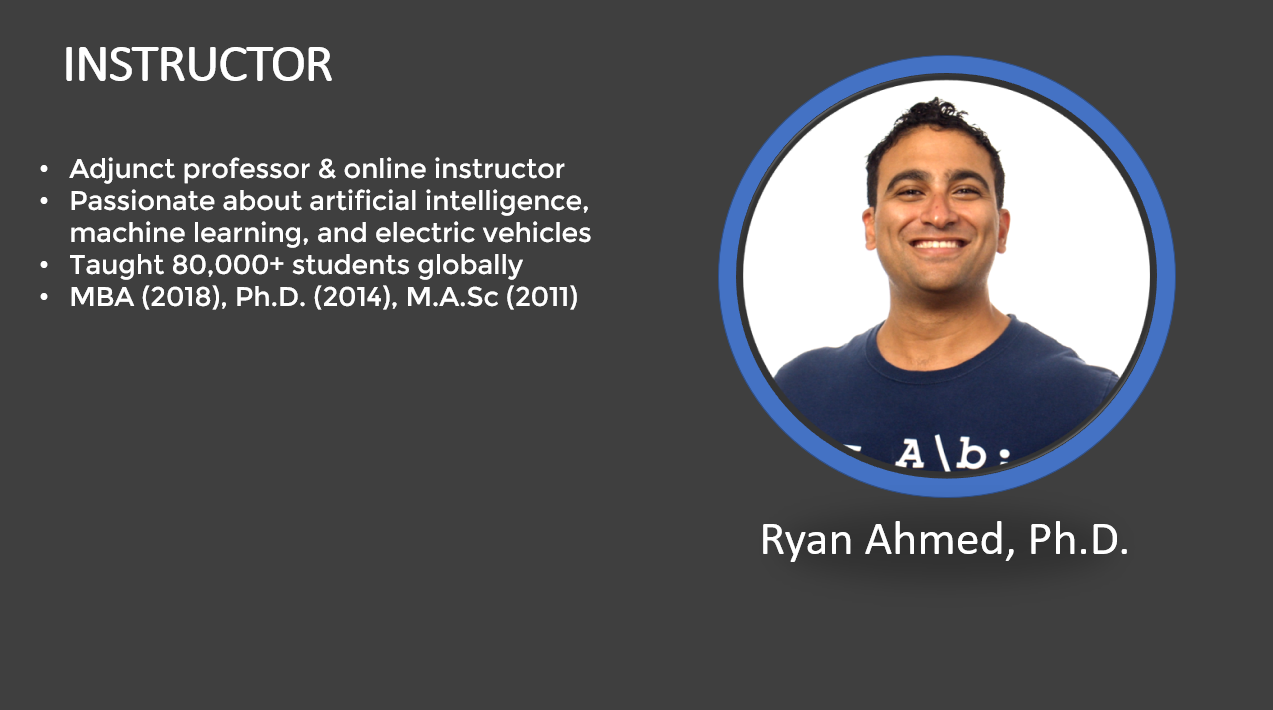

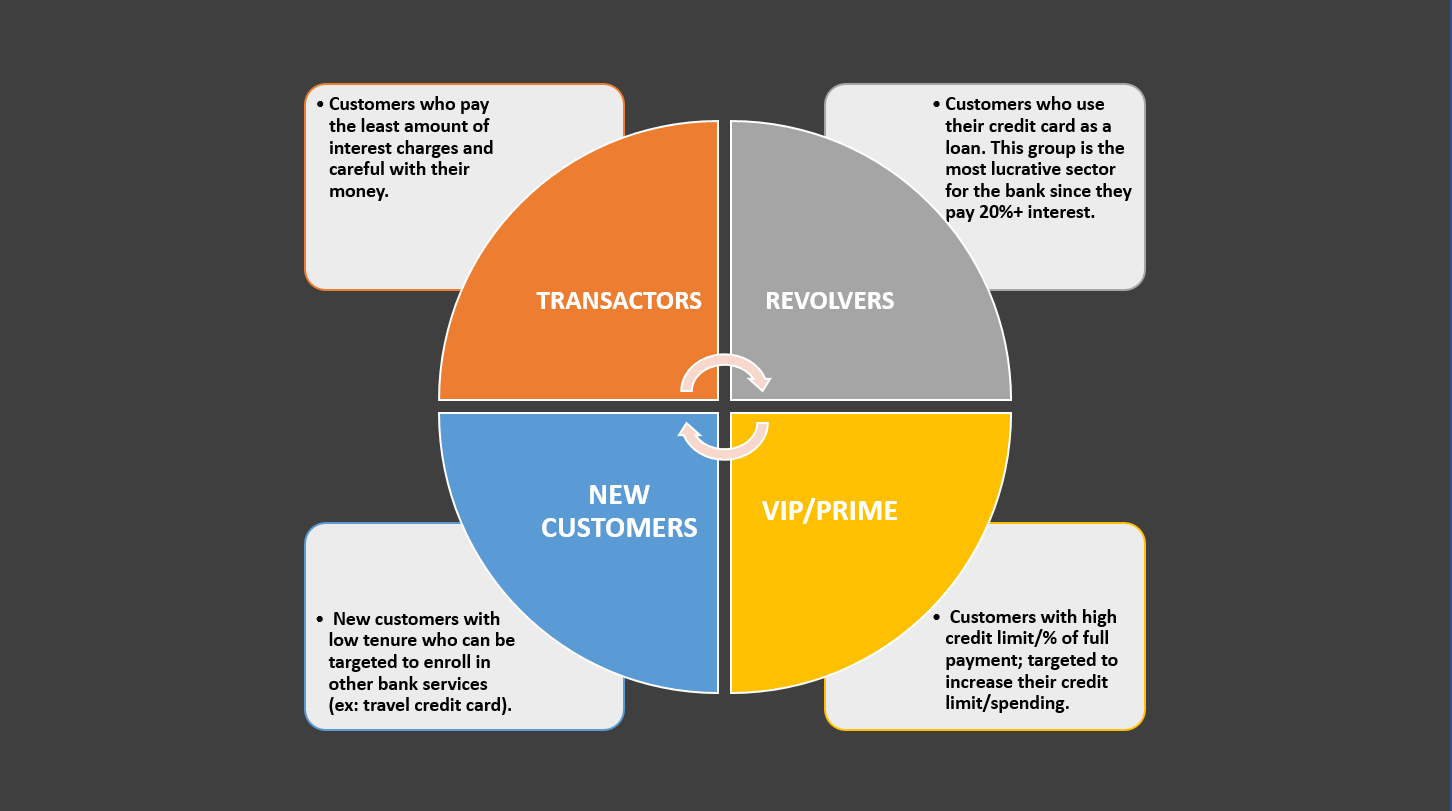

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [2]:
# You have to include the full link to the csv file containing your dataset
creditcard_df = pd.read_csv('Marketing_data.csv')

# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [3]:
creditcard_df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [4]:
creditcard_df.info()
# Let's apply info and get additional insights on our dataframe
# 18 features with 8950 points  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

MINI CHALLENGE #1: 
 - What is the average, minimum and maximum "BALANCE" amount?


In [5]:
print('Average=', np.average(creditcard_df['BALANCE']))
print('min=', np.min(creditcard_df['BALANCE']))
print('max=', np.max(creditcard_df['BALANCE']))

Average= 1564.4748276781006
min= 0.0
max= 19043.13856


In [6]:
creditcard_df.describe()
# Let's apply describe() and get more statistical insights on our dataframe
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

MINI CHALLENGE #2: 
- Obtain the features (row) of the customer who made the maximim "ONEOFF_PURCHASES"
- Obtain the features of the customer who made the maximum cash advance transaction? how many cash advance transactions did that customer make? how often did he/she pay their bill?

In [7]:
max_oneoff=np.max(creditcard_df['ONEOFF_PURCHASES'])
creditcard_df[creditcard_df['ONEOFF_PURCHASES']==max_oneoff]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  C10574  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12

In [8]:
max_CAT=np.max(creditcard_df['CASH_ADVANCE'])
creditcard_df[creditcard_df['CASH_ADVANCE']==max_CAT]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2159  C12226  10905.05381                1.0     431.93             133.5   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2159                  298.43   47137.21176             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2159                        0.25                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2159                     1.0               123             21       19600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2159  39048.59762       5394.173671               0.0      12

# TASK #3: VISUALIZE AND EXPLORE DATASET

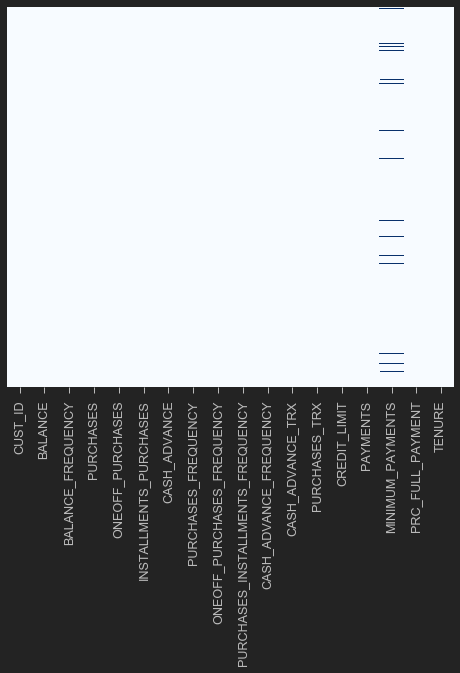

In [9]:
# Let's see if we have any missing data, luckily we don't have many!
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [10]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()


In [12]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

MINI CHALLENGE #3: 
 - Fill out missing elements in the "CREDIT_LIMIT" column
 - Double check and make sure that no missing elements are present

In [13]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()==True), 'CREDIT_LIMIT']=creditcard_df['CREDIT_LIMIT'].mean()

In [14]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

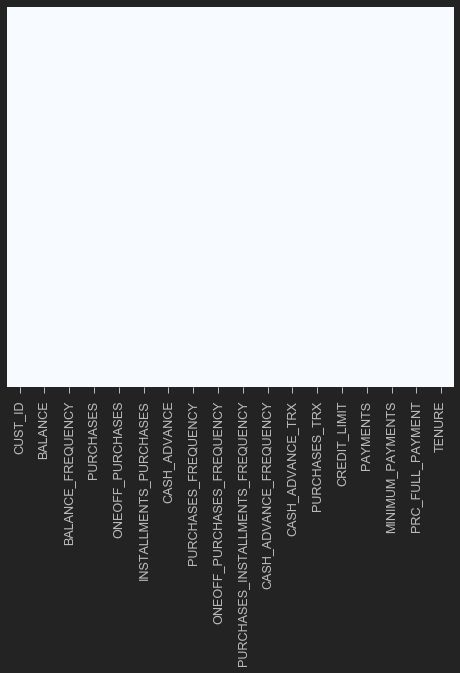

In [15]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [16]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

MINI CHALLENGE #4: 
- Drop Customer ID column 'CUST_ID' and make sure that the column has been removed from the dataframe

In [17]:
creditcard_df.drop('CUST_ID',axis=1, inplace=True)

In [18]:
creditcard_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        864.206542          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322        864.206542          0.000000       6  
8947    81

In [19]:
n = len(creditcard_df.columns)
n

17

In [20]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

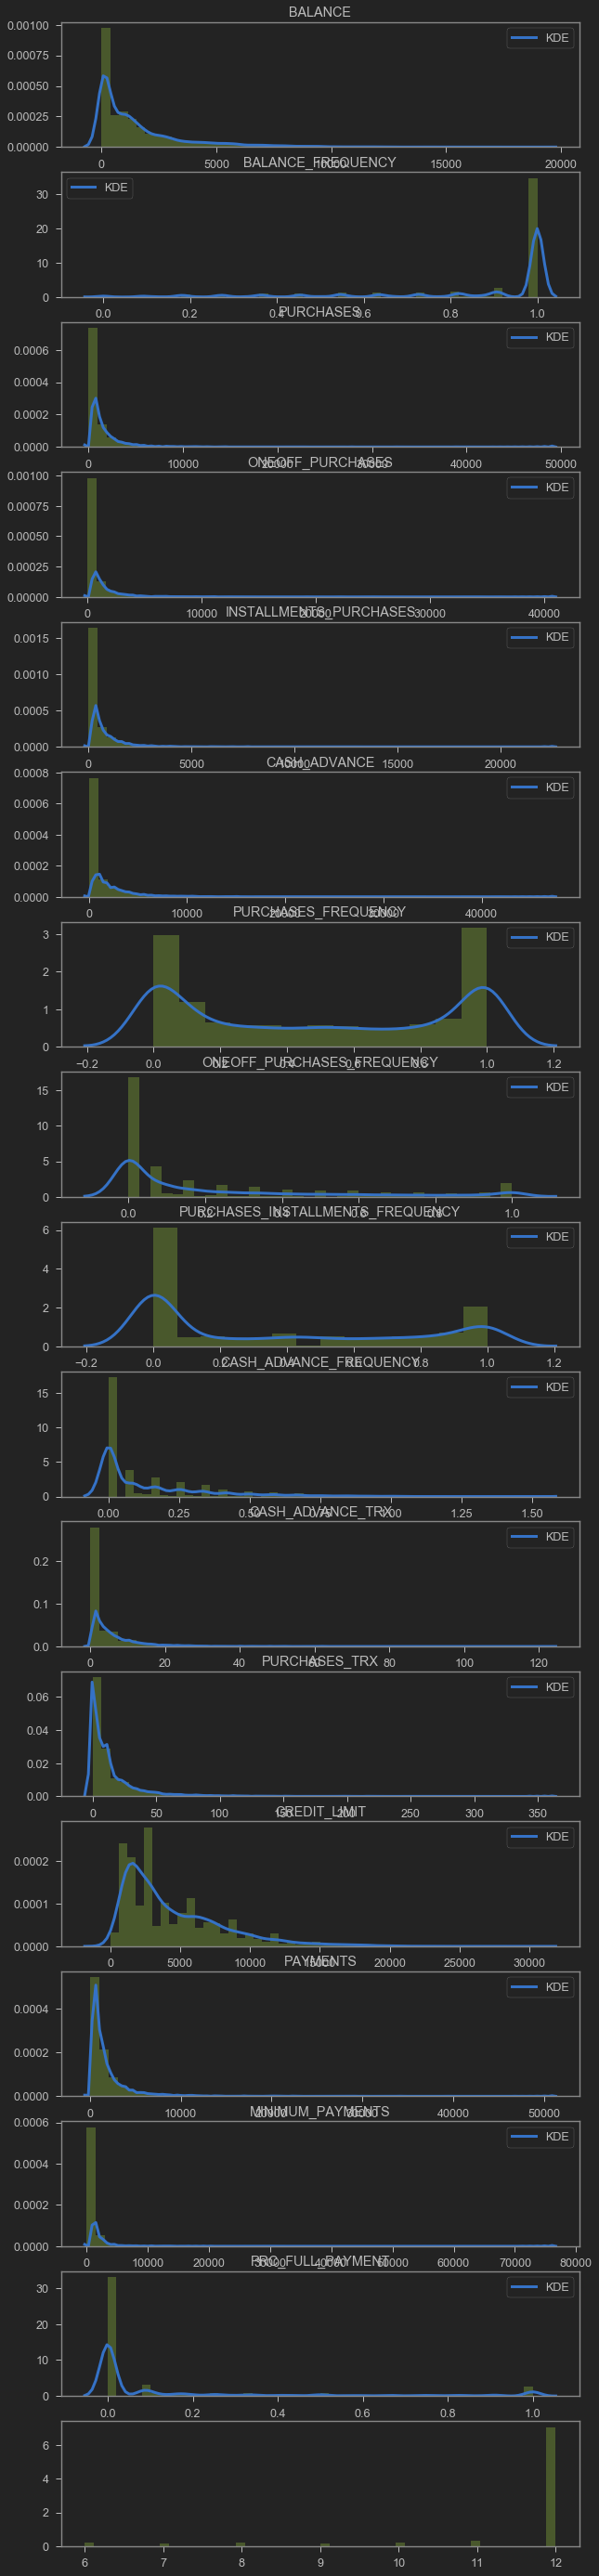

In [21]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

MINI CHALLENGE #5: 
- Obtain the correlation matrix between features

In [22]:
correlations=creditcard_df.corr()

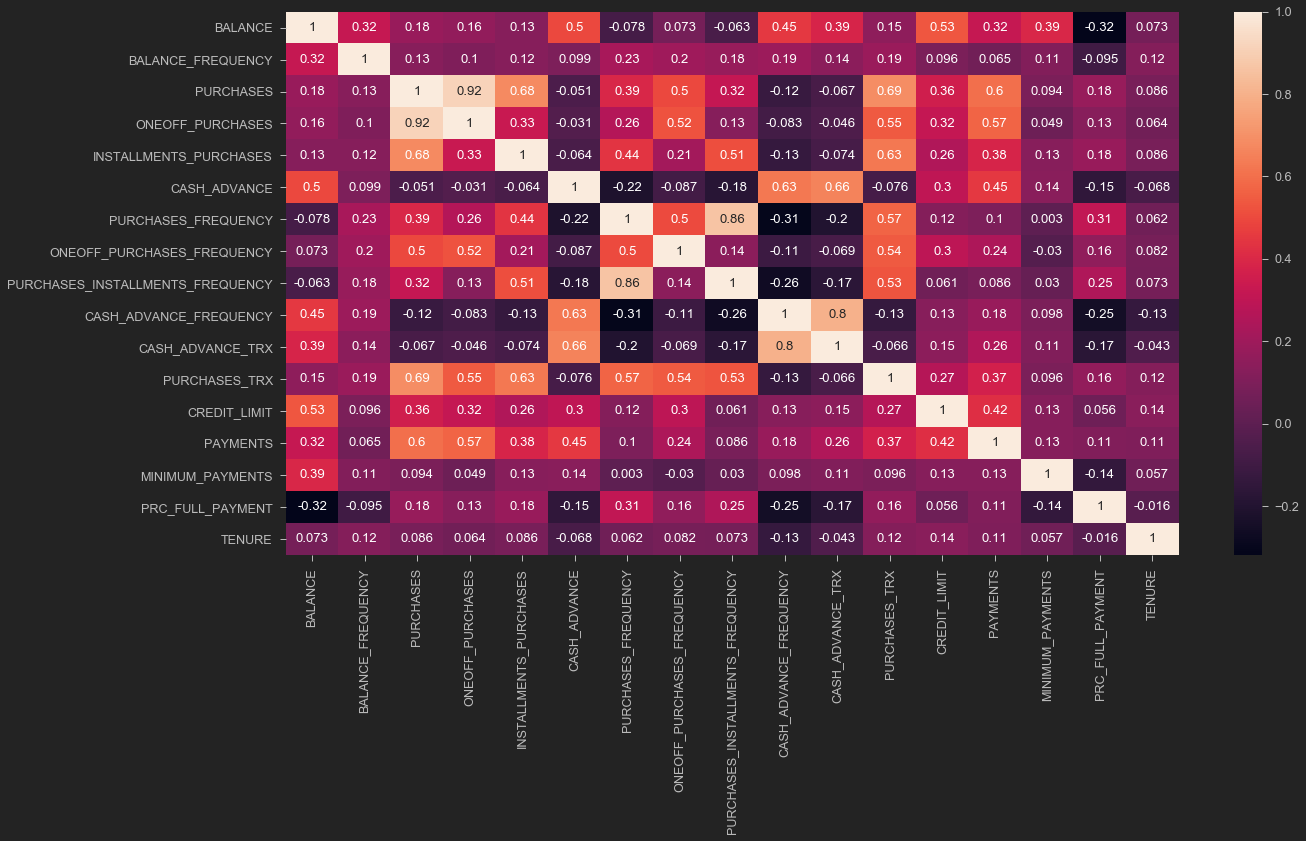

In [23]:
f,ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlations, annot=True)

# TASK #4: UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

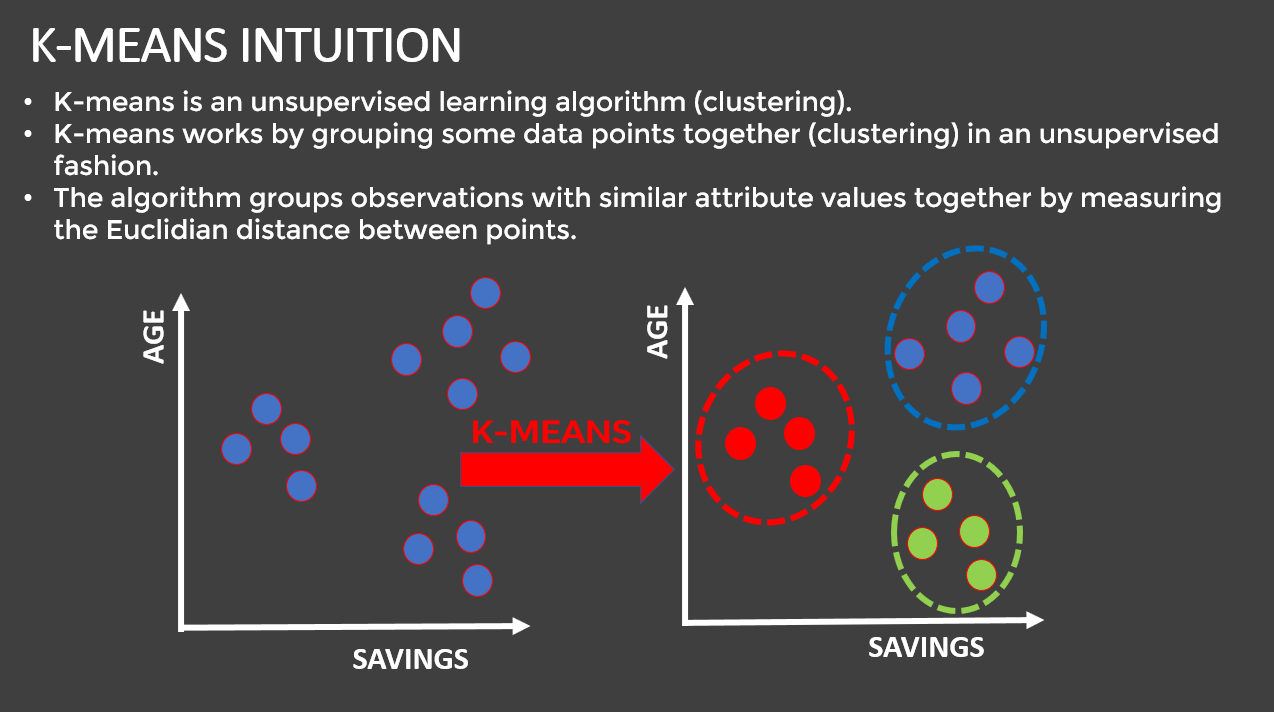

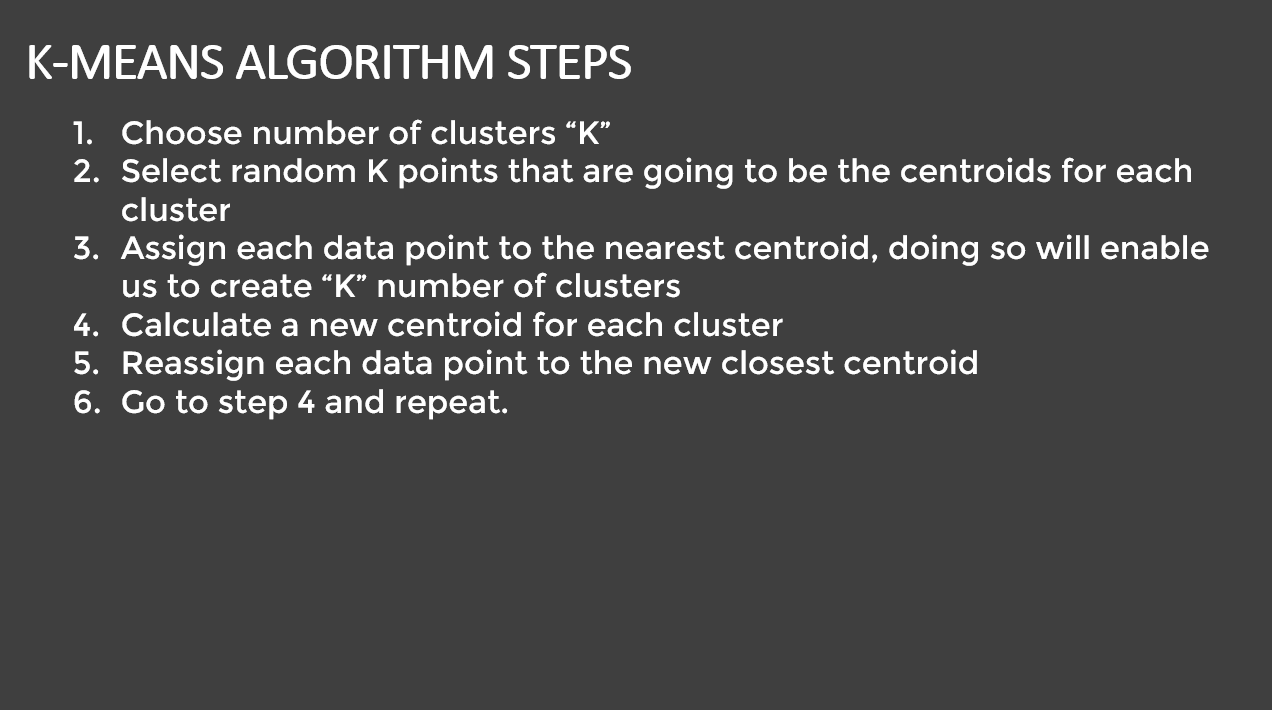

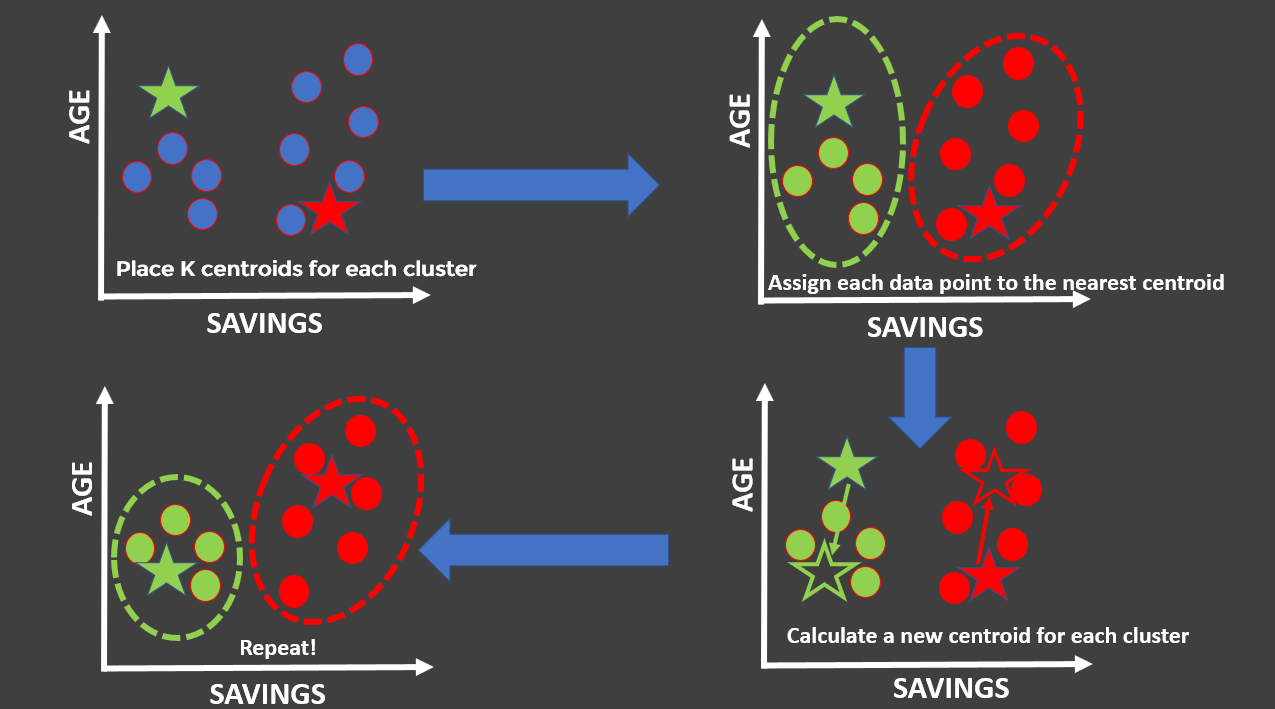

MINI CHALLENGE #6: 
- Which of the following conditions could terminate the K-means clustering algorithm? (choose 2)
    - K-means terminates after a fixed number of iterations is reached  
    - K-means terminates when the number of clusters does not increase between iterations
    - K-means terminates when the centroid locations do not change between iterations

   


K-means terminates after a fixed nuber of iterations is reached
K-means terminates when the centroid locations do not change between iterations

# TASK #5: LEARN HOW TO OBTAIN THE OPTIMAL NUMBER OF CLUSTERS (ELBOW METHOD)

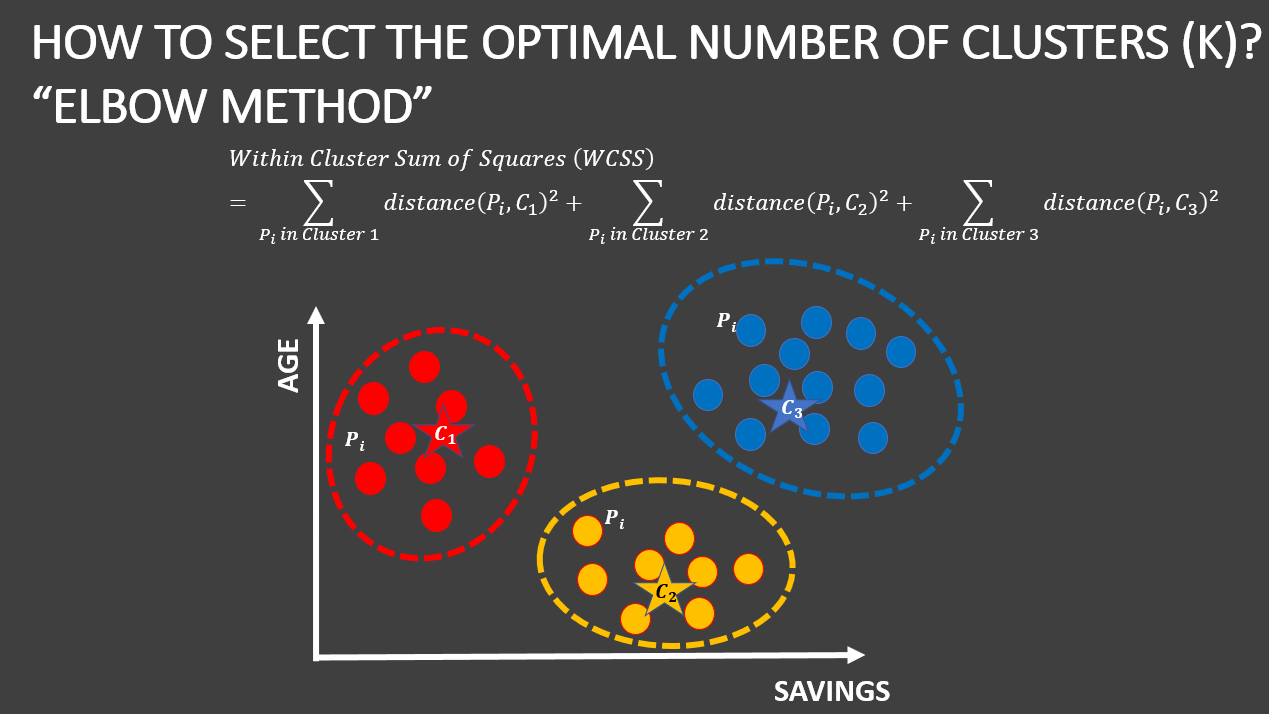

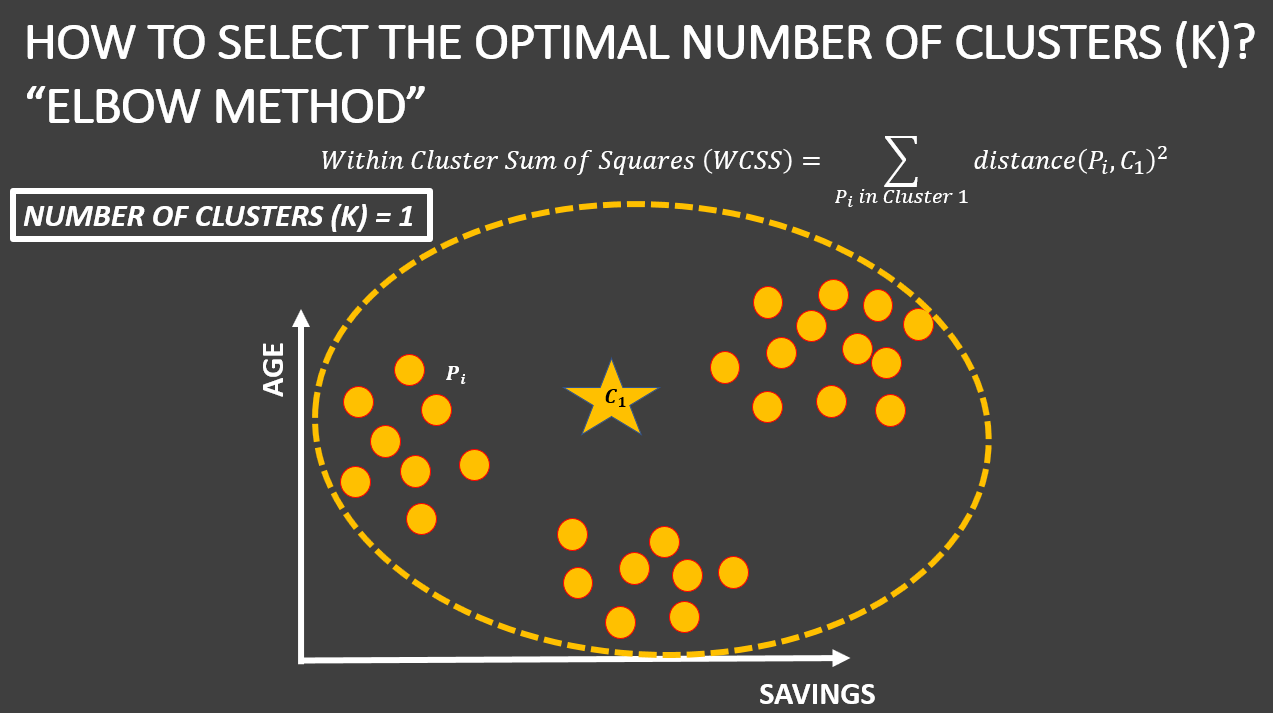

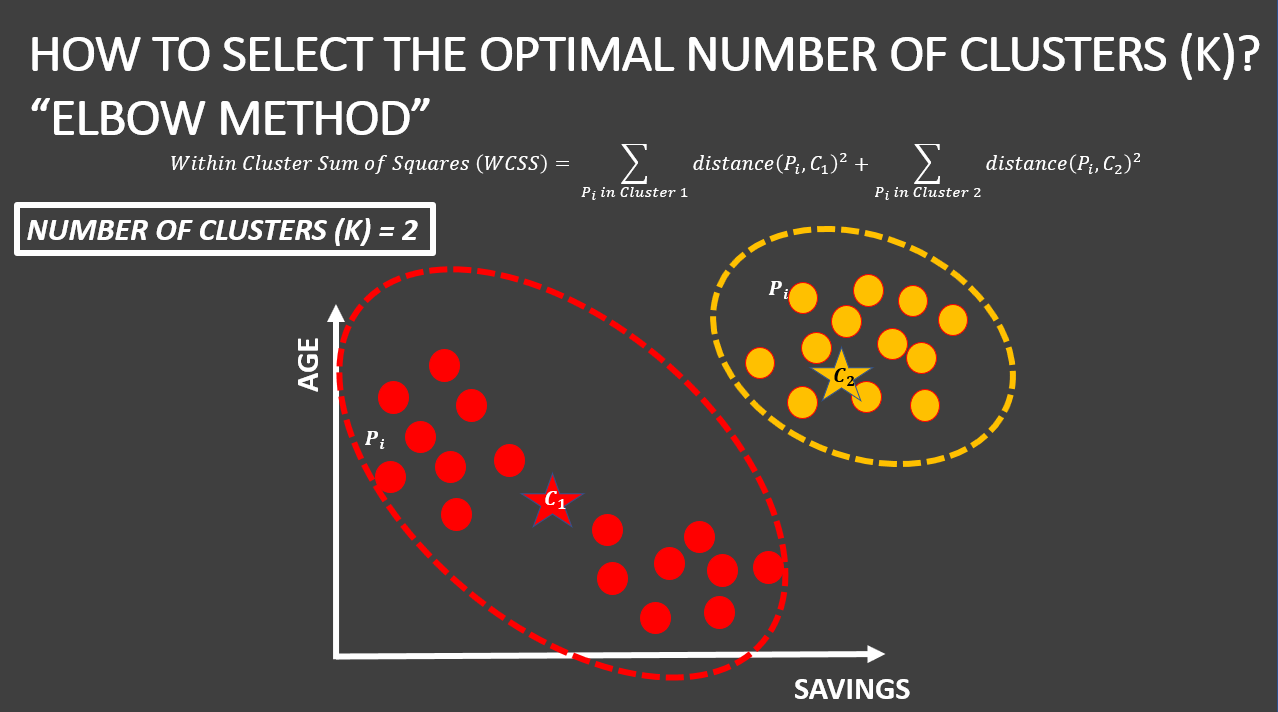

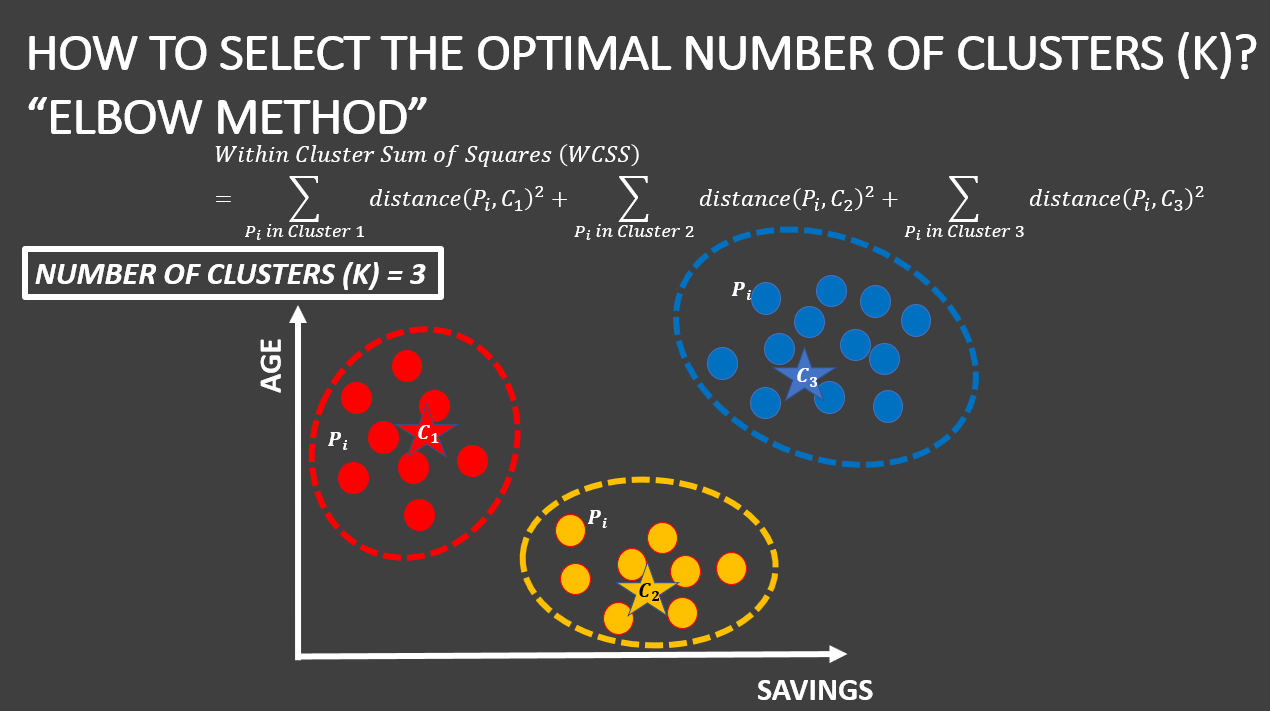

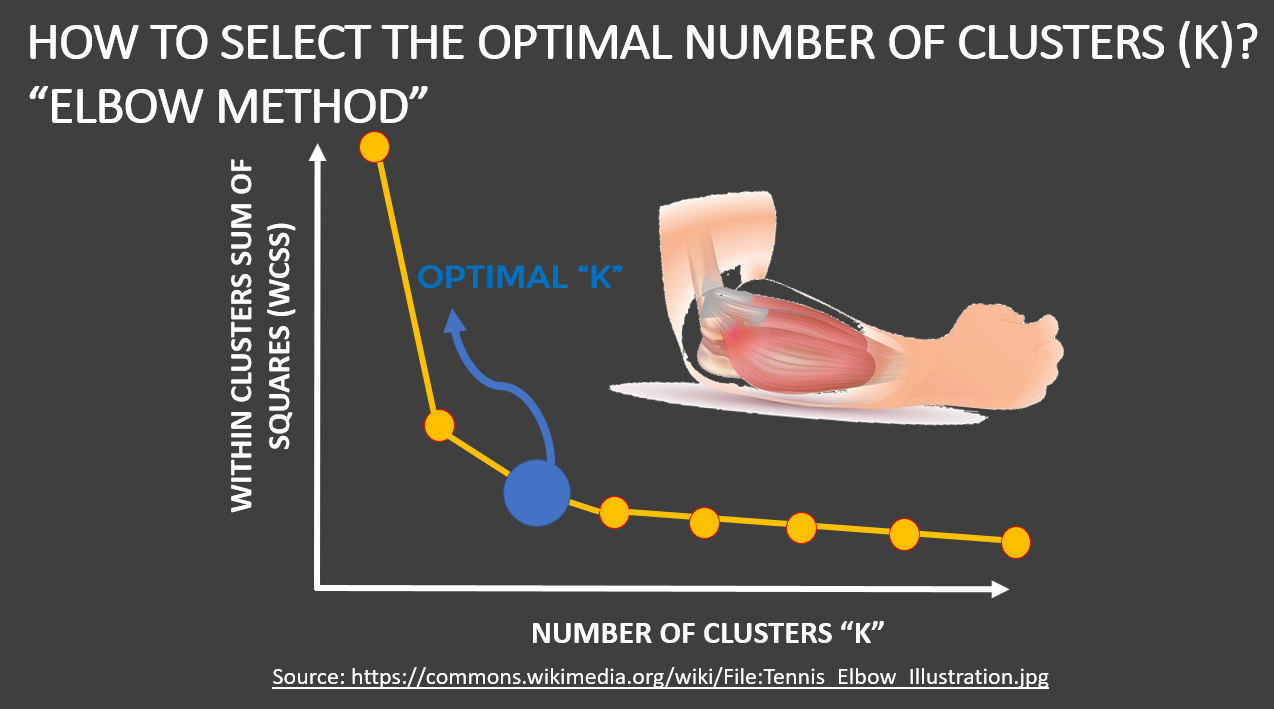

# TASK #6: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [24]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [25]:
creditcard_df_scaled.shape

(8950, 17)

In [26]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

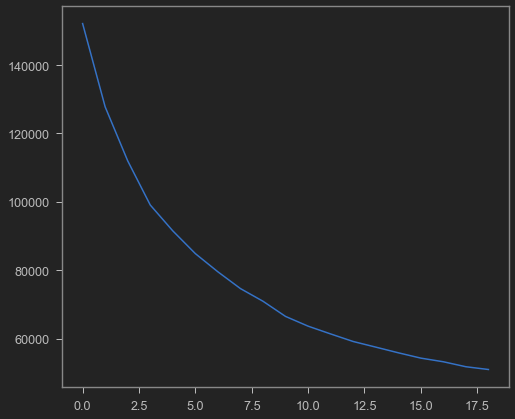

In [27]:
# Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
#       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
#       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
#       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
#       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
#       'TENURE'], dtype='object')

scores_1=[]
range_values=range(1,20)

for i in range_values:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_)

plt.plot(scores_1, 'bx-')
# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7 or 8.

MINI CHALLENGE #7:
 - Let's assume that our data only consists of the first 7 columns of "creditcard_df_scaled", what is the optimal number of clusters would be in this case? modify the code and rerun the cells. 

# TASK #7: APPLY K-MEANS METHOD

In [28]:
kmeans = KMeans(7)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [29]:
kmeans.cluster_centers_.shape

(7, 17)

In [30]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.701872         -2.134325 -0.306924        -0.230292   
1  1.666473          0.392099 -0.205327        -0.149913   
2  1.430238          0.419467  6.915048         6.083034   
3  0.007813          0.402983 -0.343915        -0.225214   
4  0.126801          0.429730  0.939029         0.895888   
5 -0.335506         -0.348076 -0.284525        -0.208973   
6 -0.367555          0.330562 -0.039840        -0.234950   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.302515    -0.323078           -0.547138   
1              -0.210162     1.990753           -0.456789   
2               5.172266     0.038778            1.090699   
3              -0.399316    -0.104212           -0.810261   
4               0.574411    -0.309125            1.092770   
5              -0.288475     0.065539           -0.198735   
6               0.337266    -0.368099            0.980609   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.427951                        -0.441452   
1                  -0.190269                        -0.404044   
2                   1.879303                         1.049413   
3                  -0.336386                        -0.752275   
4                   1.872513                         0.534806   
5                  -0.272572                        -0.230755   
6                  -0.357343                         1.173200   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.522249        -0.376815     -0.416568    -0.172739   
1               1.908547         1.922104     -0.241414     1.007587   
2              -0.249227        -0.038166      4.646228     2.198371   
3               0.084852        -0.041723     -0.464616    -0.301035   
4              -0.410394        -0.320751      1.196848     0.701672   
5               0.304112        -0.002216     -0.385586    -0.556898   
6              -0.477687        -0.362424      0.173897    -0.278236   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.201746        -0.257554         0.295010  0.200781  
1  0.834821         0.552973        -0.391161  0.069807  
2  4.783704         1.080945         0.824001  0.334613  
3 -0.248908        -0.015791        -0.452844  0.272305  
4  0.385048        -0.057462         0.456446  0.307642  
5 -0.390701        -0.209383         0.012899 -3.193765  
6 -0.221810        -0.015735         0.307237  0.252156

In [31]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0   103.587241          0.371669    347.456361       210.199629   
1  5033.096672          0.970155    564.520447       343.613277   
2  4541.393882          0.976638  15777.311395     10689.027791   
3  1580.736068          0.972734    268.425678       218.628807   
4  1828.399674          0.979070   3009.455142      2079.427650   
5   866.148306          0.794815    395.311749       245.585564   
6   799.439665          0.955578    918.085545       202.468866   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             137.506773   301.361116            0.270757   
1             221.020895  5153.573564            0.307019   
2            5088.283605  1060.190695            0.928101   
3              49.971063   760.334088            0.165154   
4             930.500678   330.620880            0.928932   
5             150.203132  1116.308792            0.410589   
6             716.053491   206.951098            0.883916   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.074792                         0.188993   
1                   0.145697                         0.203860   
2                   0.763090                         0.781501   
3                   0.102107                         0.065464   
4                   0.761065                         0.576983   
5                   0.121144                         0.272729   
6                   0.095855                         0.830697   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.030637         0.677338      4.355518   3865.955724   
1               0.517064        16.365772      8.709172   8160.463697   
2               0.085271         2.988372    130.197674  12493.023256   
3               0.152124         2.964097      3.161211   3399.161094   
4               0.053020         1.059937     44.458991   7047.418985   
5               0.196000         3.233704      5.125596   2468.226470   
6               0.039554         0.775550     19.032274   3482.112568   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0   1149.108580       263.988609         0.240000  11.786015  
1   4149.870001      2152.885952         0.039307  11.610738  
2  15581.496801      3383.304083         0.394721  11.965116  
3   1012.580763       827.406808         0.021266  11.881732  
4   2847.821449       730.293998         0.287217  11.929022  
5    602.104087       376.247870         0.157487   7.243243  
6   1091.026929       827.537625         0.243576  11.854768

In [32]:
labels.shape # Labels associated to each data point

(8950,)

In [33]:
labels.max()

6

In [34]:
labels.min()

0

In [35]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans


array([0, 4, 6, ..., 2, 2, 2])

In [36]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        3  
1  4103.032597       1072.340217          0.222222      12        1  
2   622.066742        627.284787          0.000000      12        4  
3     0.000000        864.206542          0.000000      12        3  
4   678.334763        244.791237          0.000000      12        3

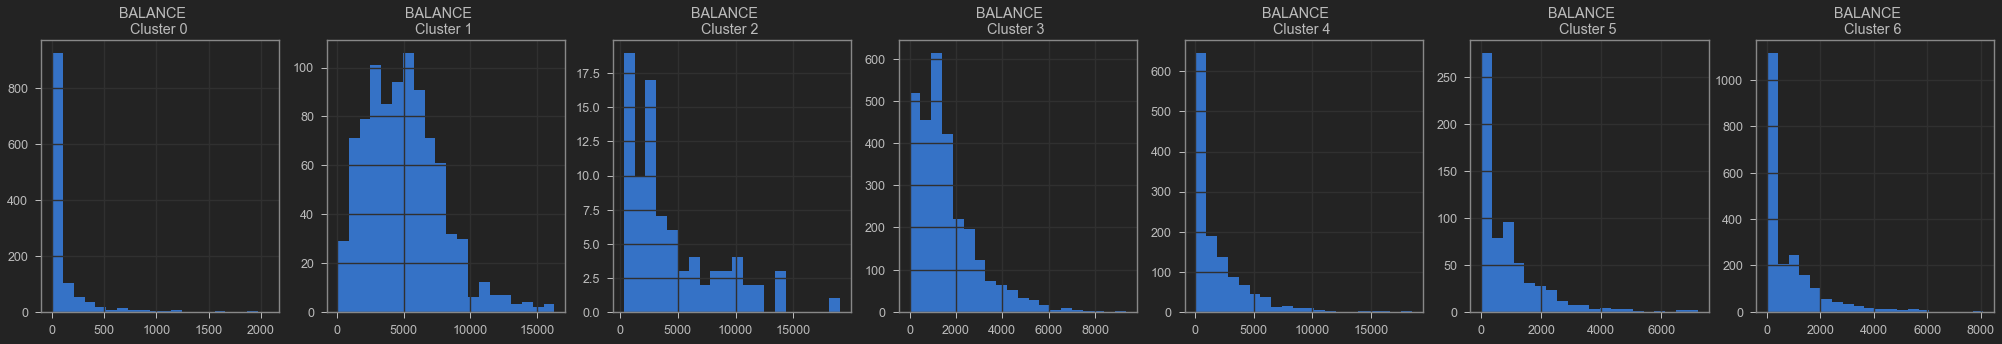

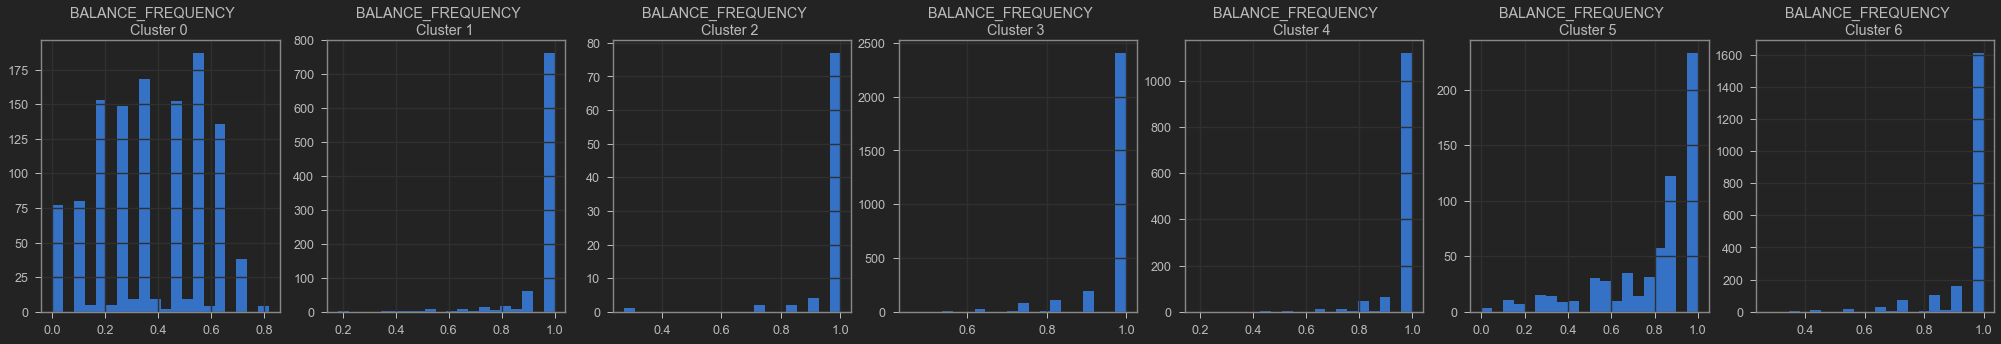

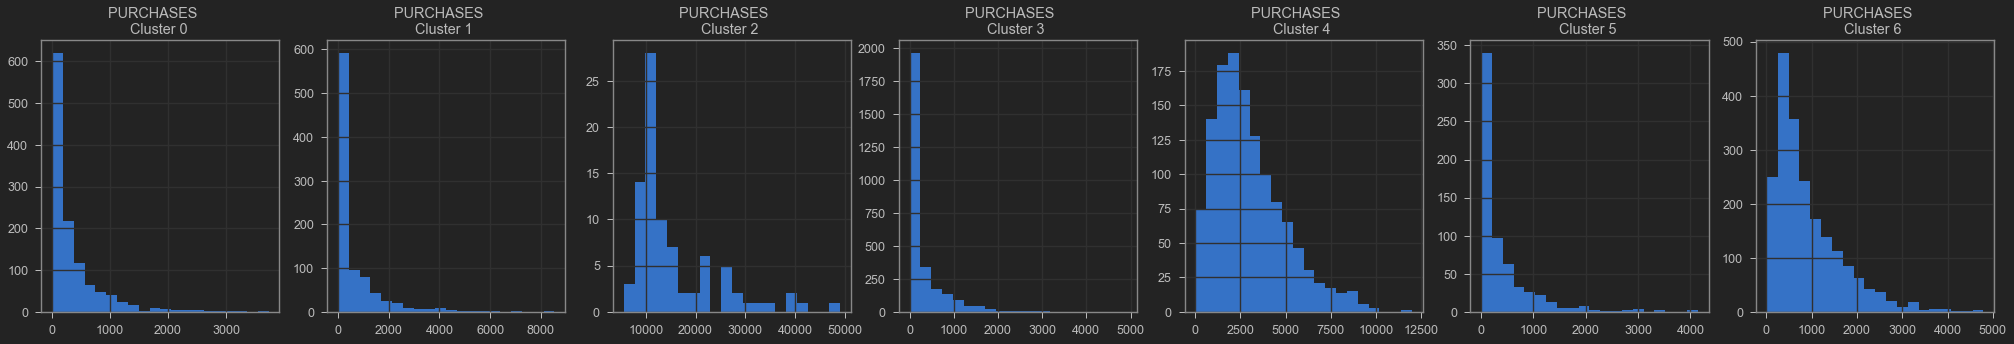

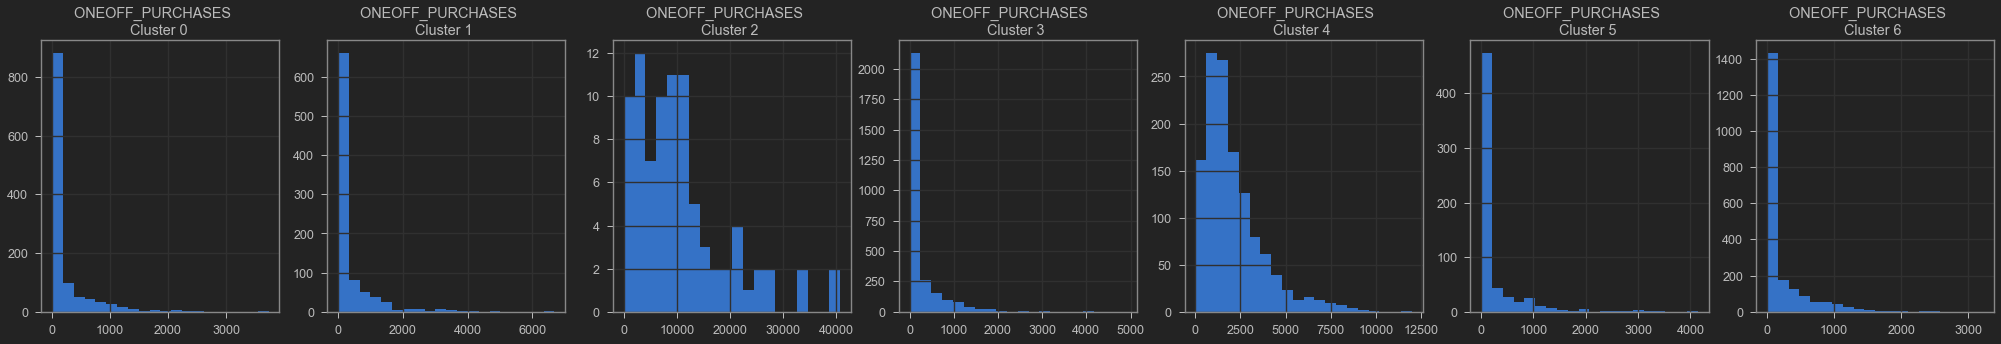

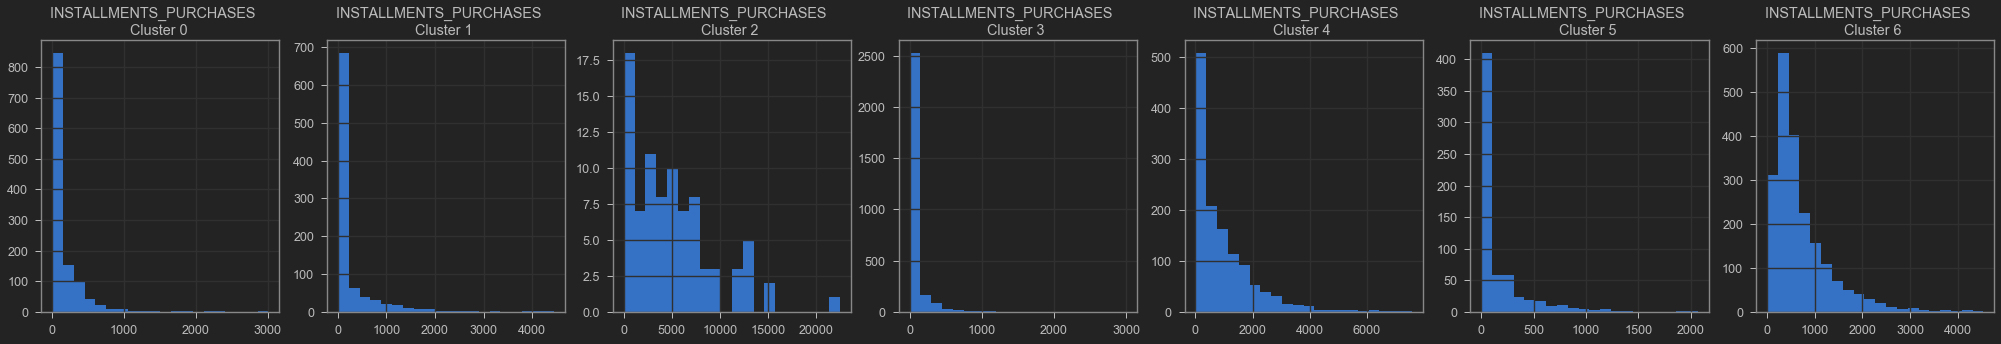

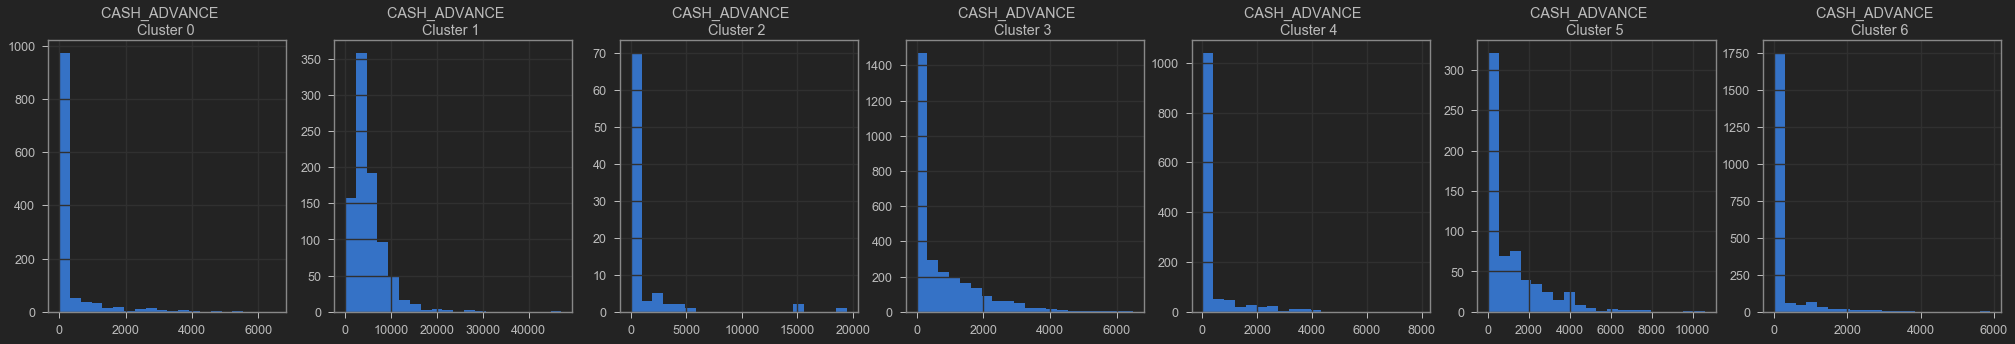

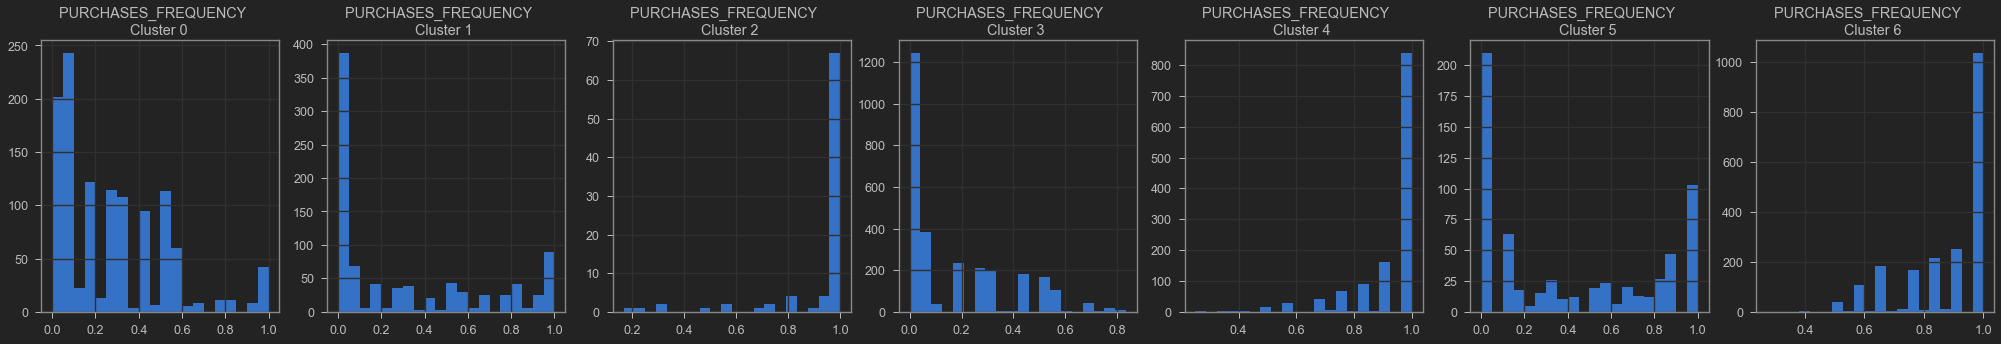

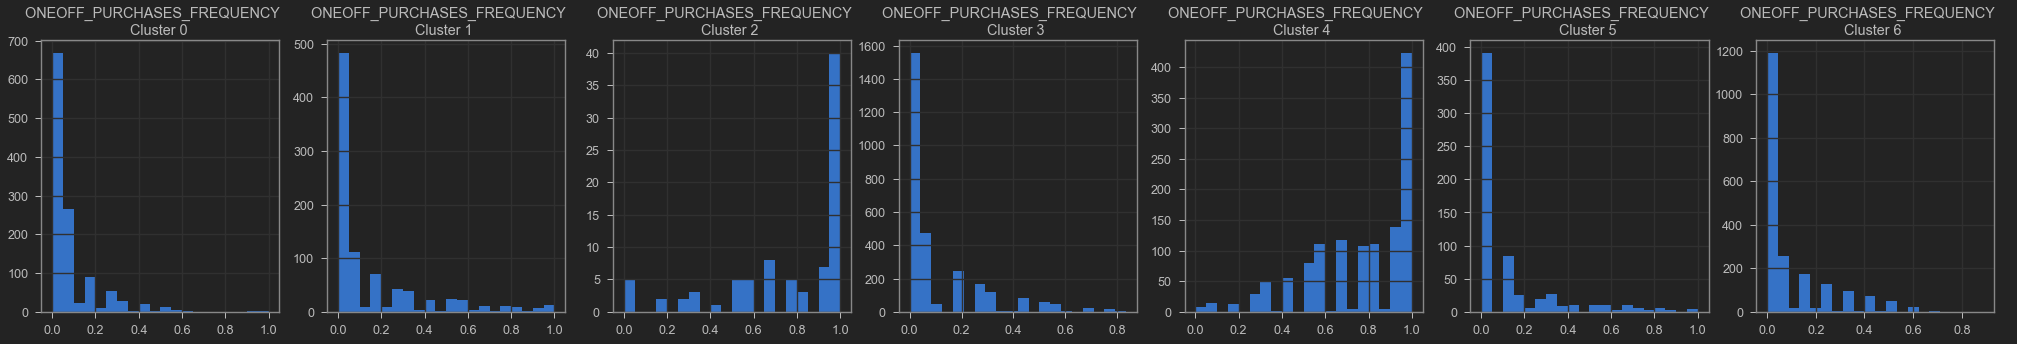

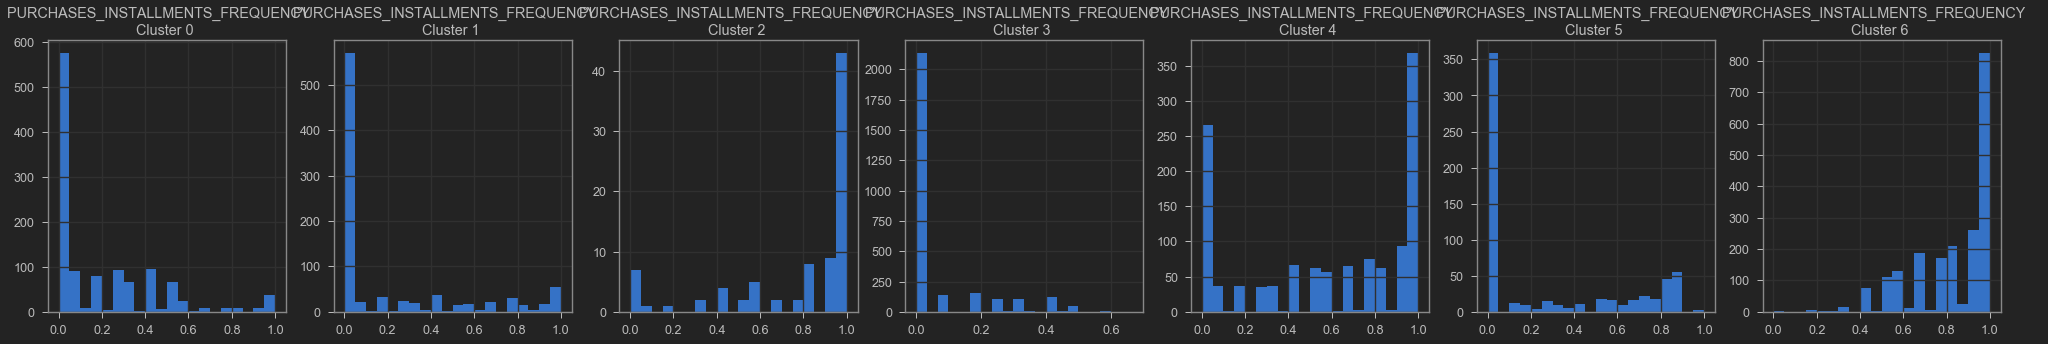

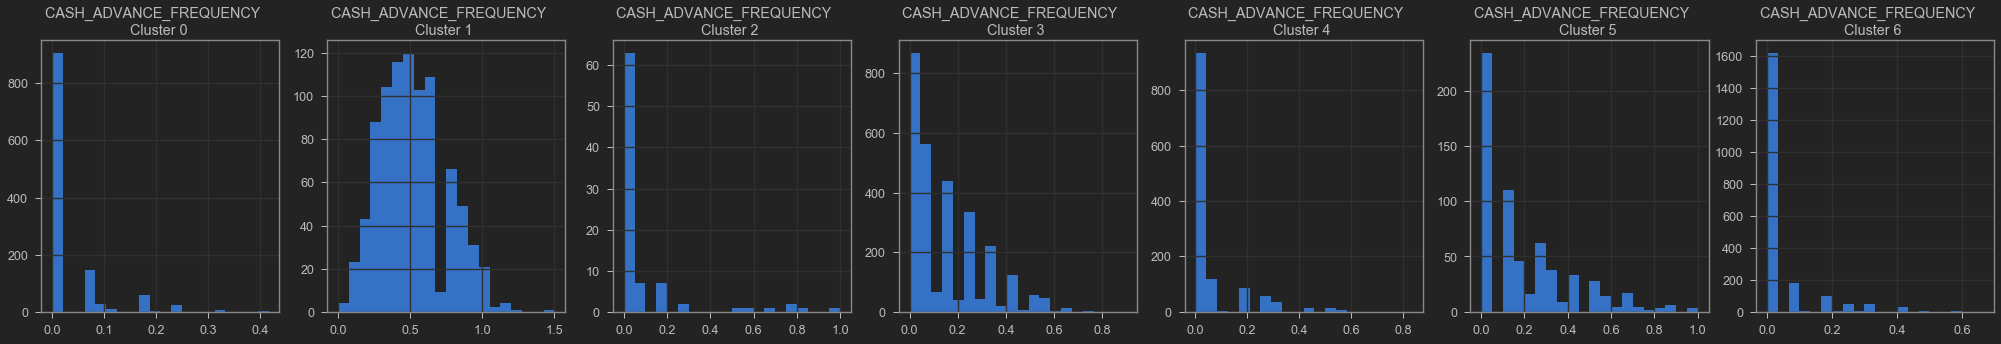

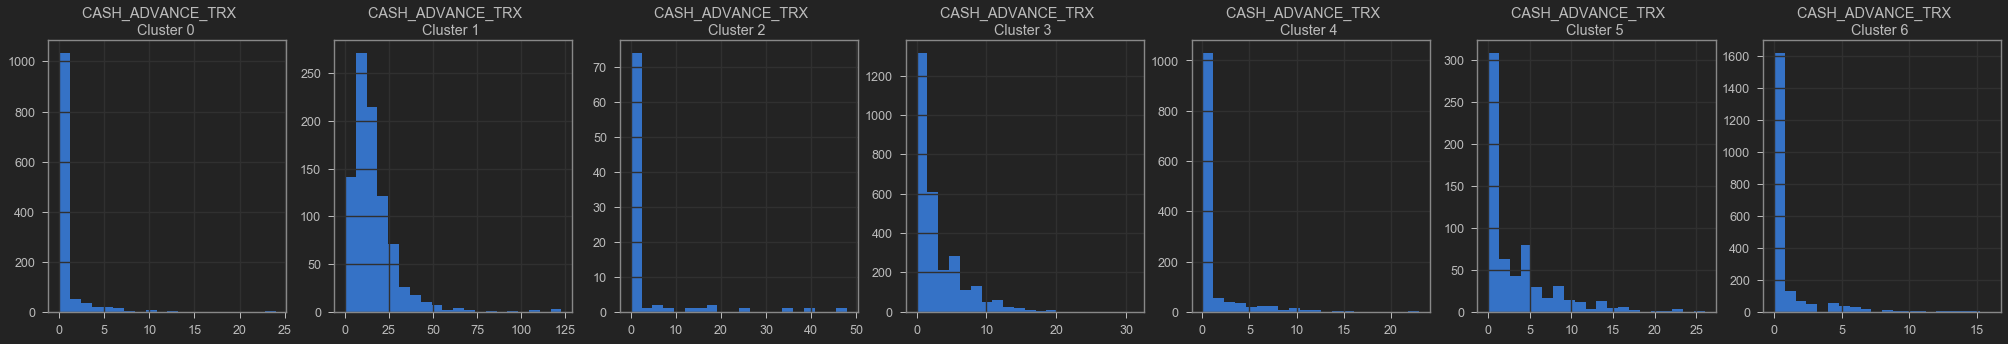

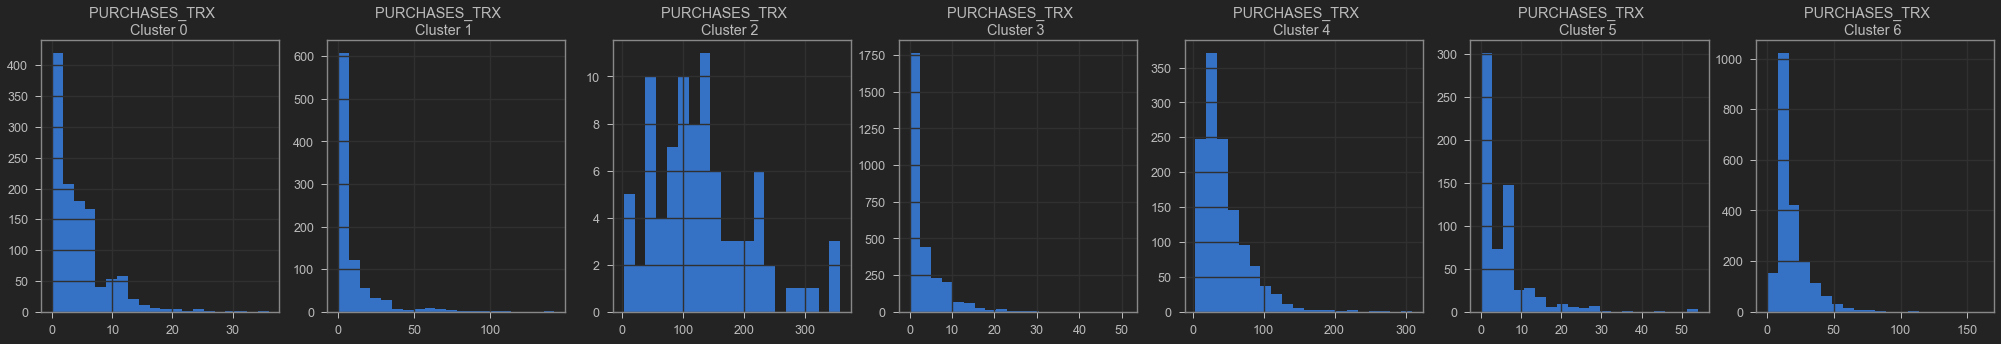

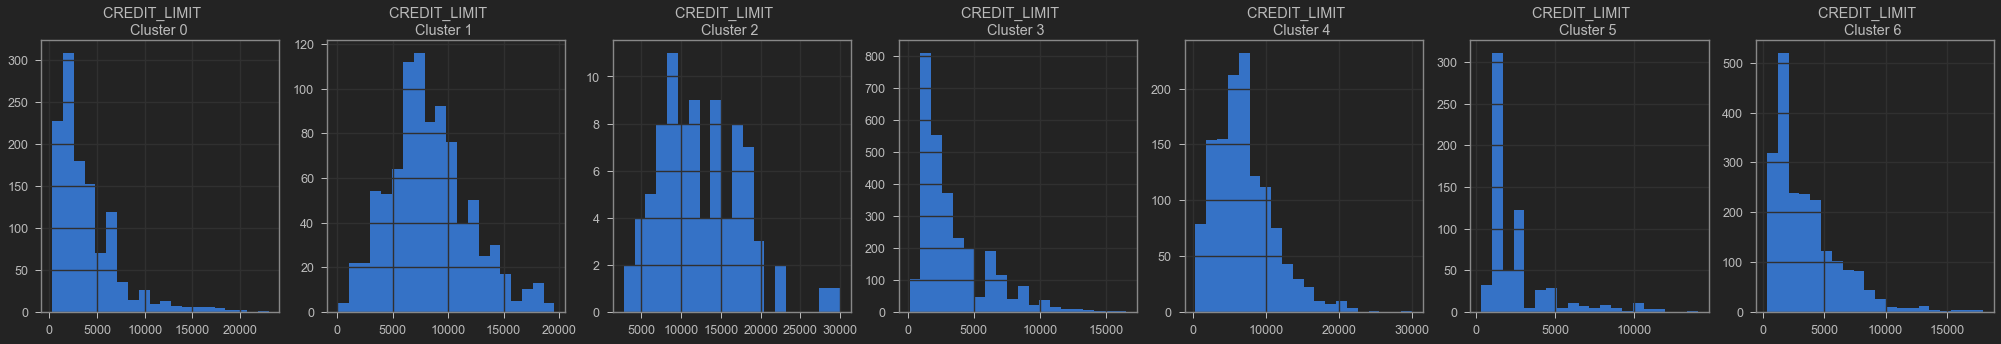

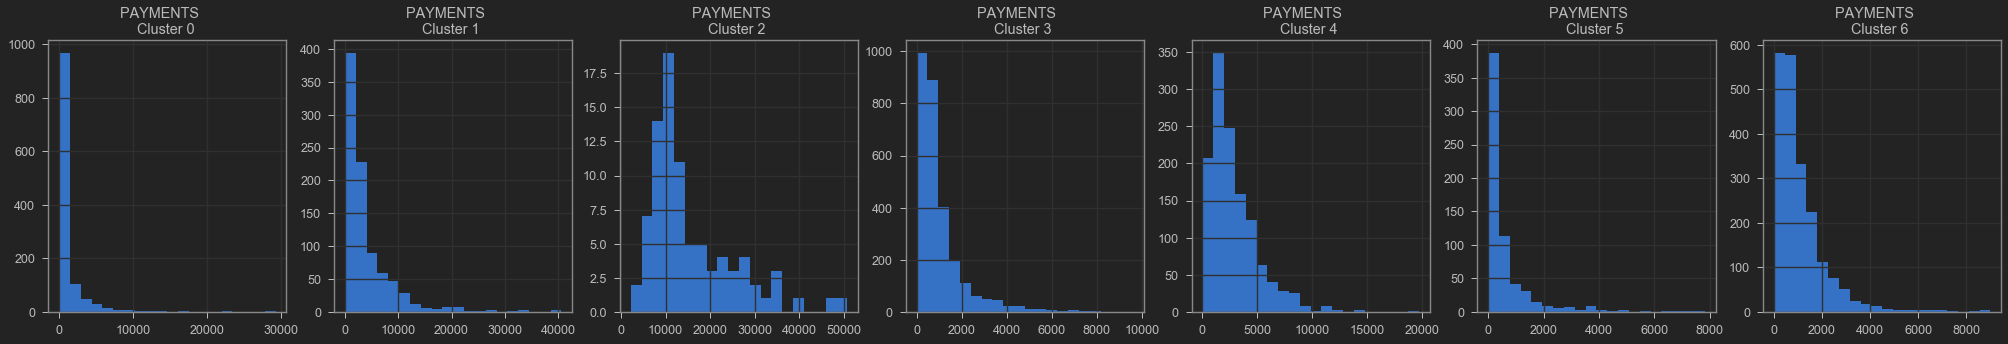

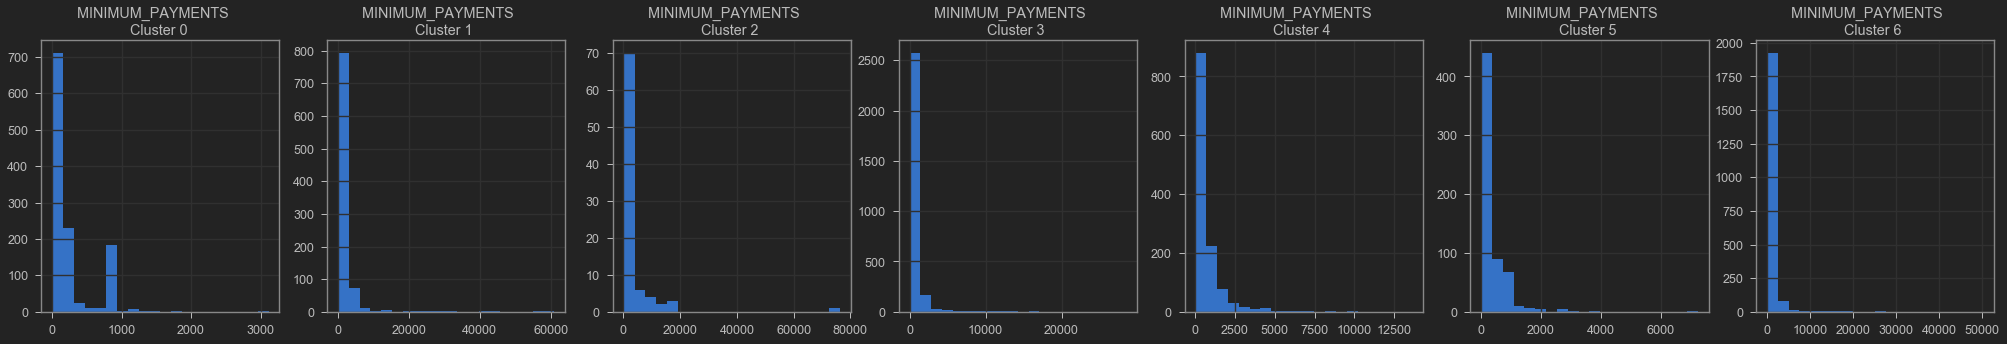

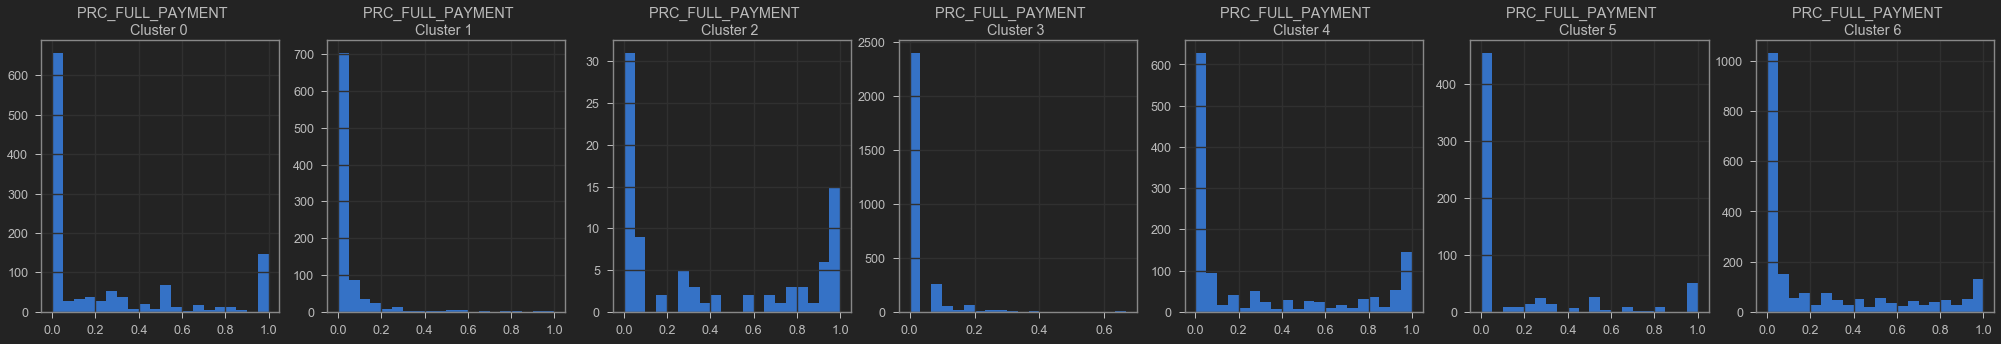

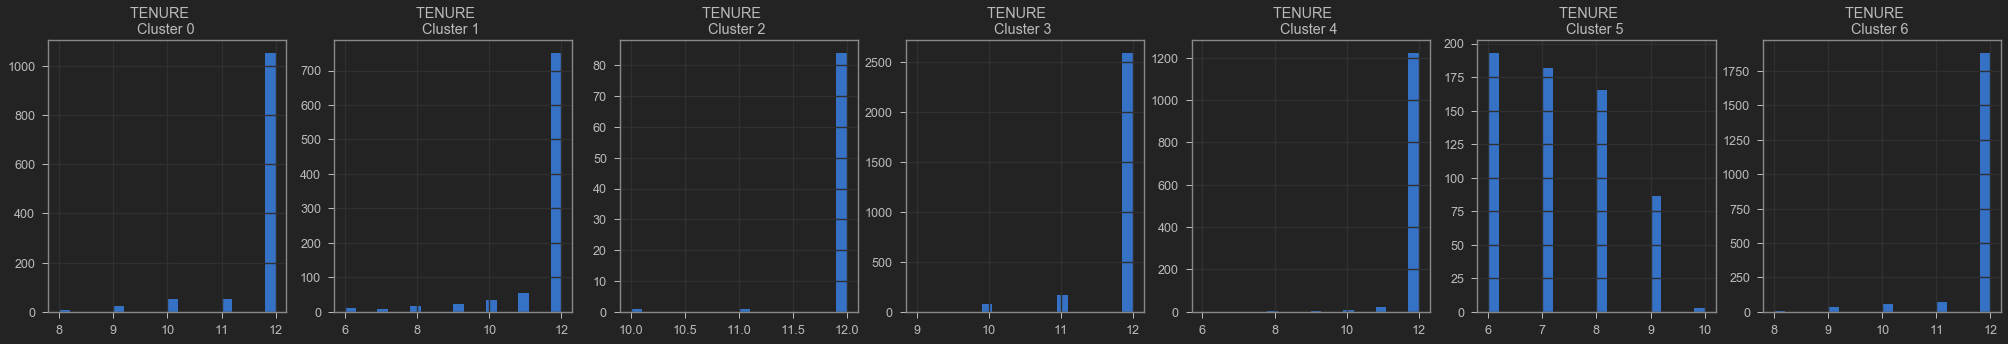

In [37]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()



MINI CHALLENGE #8:
 - Repeat the same procedure with 8 clusters instead of 7


# TASK 8: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

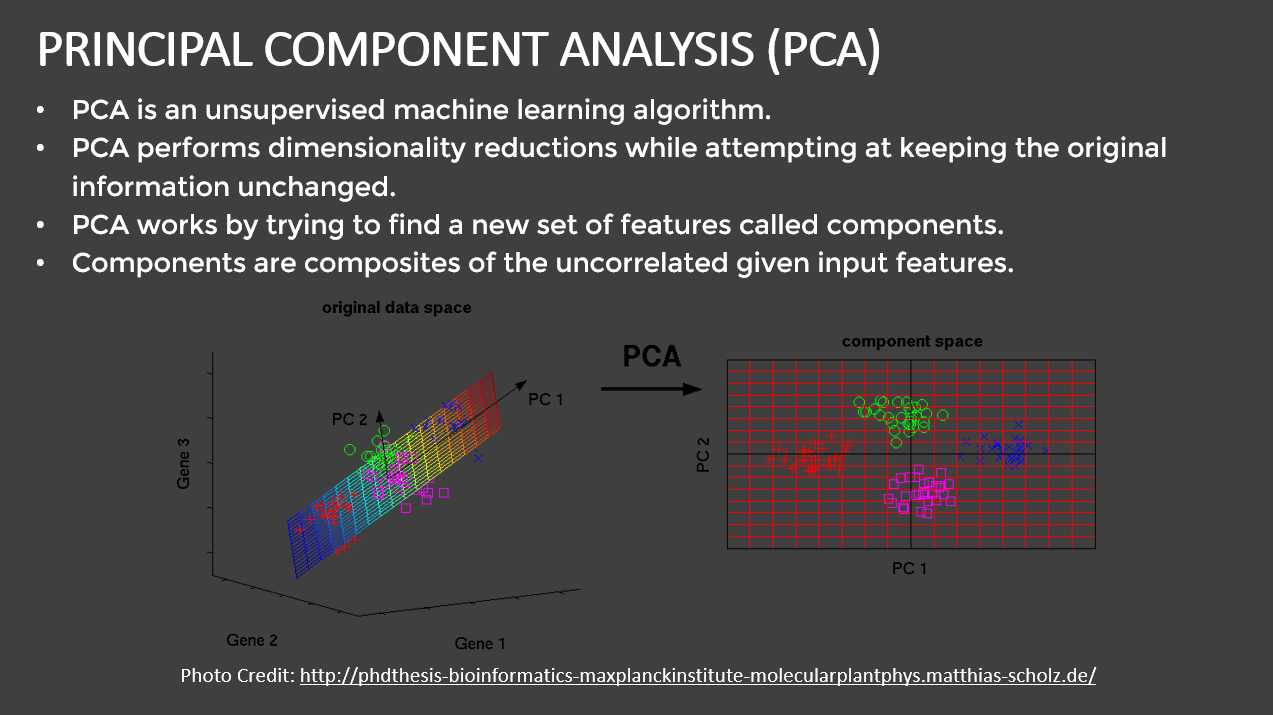

In [38]:
# Obtain the principal components 
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222066, -1.07645196],
       [-1.13830277,  2.50646524],
       [ 0.96967876, -0.38352748],
       ...,
       [-0.92619924, -1.81078038],
       [-2.33655076, -0.65796453],
       [-0.55642789, -0.40047252]])

In [39]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

pca1      pca2
0 -1.682221 -1.076452
1 -1.138303  2.506465
2  0.969679 -0.383527
3 -0.873622  0.043173
4 -1.599436 -0.688584

In [40]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.682221 -1.076452        3
1 -1.138303  2.506465        1
2  0.969679 -0.383527        4
3 -0.873622  0.043173        3
4 -1.599436 -0.688584        3

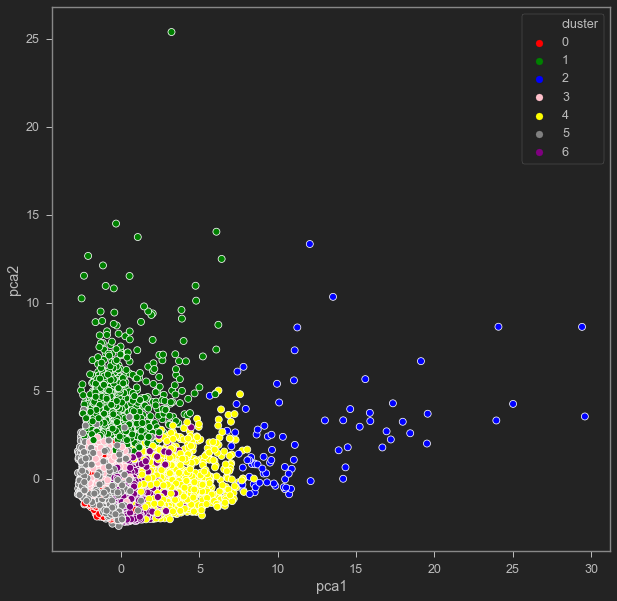

In [42]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()

MINI CHALLENGE #9: 
 - Repeat task #7 and #8 with number of clusters = 7 and 4

In [53]:
##MINI CHALLENGE 8

In [43]:
#Mini Challenge 8

kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [44]:
kmeans.cluster_centers_.shape

(8, 17)

In [45]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY  PURCHASES ONEOFF_PURCHASES  \
0  0.011616          0.404256  -0.354537        -0.239039   
1 -0.359531          0.331759  -0.031115        -0.241199   
2  1.681673          0.392153  -0.219524        -0.156195   
3 -0.116507          0.403108   0.580797         0.703510   
4 -0.700928         -2.138065  -0.309875        -0.234351   
5  1.110524          0.475325   2.588476         1.854742   
6  1.865907          0.332878  12.596844        13.111182   
7 -0.336536         -0.346748  -0.286714        -0.212513   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.399031    -0.096103           -0.843575   
1               0.369357    -0.363481            0.994582   
2              -0.232170     2.015728           -0.477451   
3               0.080614    -0.330500            0.998882   
4              -0.302036    -0.322516           -0.553674   
5               2.713051    -0.123777            1.169487   
6               5.696389    -0.004178            1.033322   
7              -0.287144     0.068083           -0.200686   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.383831                        -0.752806   
1                  -0.381258                         1.205468   
2                  -0.210189                        -0.419008   
3                   1.912795                         0.215634   
4                  -0.440210                        -0.439588   
5                   1.564483                         1.291923   
6                   2.170634                         0.866221   
7                  -0.282972                        -0.225256   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.099721        -0.030497     -0.478261    -0.303491   
1              -0.472411        -0.359872      0.193342    -0.260820   
2               1.921204         1.929140     -0.269113     1.023446   
3              -0.416574        -0.332519      0.666814     0.468514   
4              -0.521496        -0.376524     -0.418513    -0.175016   
5              -0.266764        -0.124655      3.244086     1.345044   
6              -0.476183        -0.214854      4.566558     3.174197   
7               0.306399        -0.000298     -0.387158    -0.563575   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.249850        -0.008011        -0.454928  0.273196  
1 -0.213685        -0.035871         0.313446  0.255570  
2  0.819606         0.511294        -0.390944  0.069513  
3  0.172077        -0.155020         0.460138  0.275299  
4 -0.202031        -0.256786         0.281800  0.199250  
5  1.526301         0.726365         0.244626  0.335310  
6  8.991136         1.064817         1.236317  0.295702  
7 -0.391392        -0.209433         0.014474 -3.200691

In [46]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0  1588.651919          0.973035    245.731243       195.681041   
1   816.141992          0.955861    936.727078       192.097063   
2  5064.735041          0.970168    534.188310       333.186299   
3  1321.975888          0.972763   2244.086758      1760.120558   
4   105.552739          0.370783    341.151561       203.462143   
5  3875.937342          0.989871   6533.523642      3670.929321   
6  5448.201718          0.956126  27916.555652     22354.314348   
7   864.004329          0.795129    390.635481       239.709567   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              50.228473   777.338419            0.151783   
1             745.072452   216.634104            0.889525   
2             201.118874  5205.946236            0.298726   
3             483.966200   285.796727            0.891250   
4             137.939882   302.539864            0.268134   
5            2864.446173   719.305810            0.959722   
6            5562.241304   970.110470            0.905072   
7             151.406683  1121.643684            0.409806   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.087954                         0.065253   
1                   0.088721                         0.843521   
2                   0.139754                         0.197913   
3                   0.773081                         0.450136   
4                   0.071134                         0.189734   
5                   0.669173                         0.877881   
6                   0.850000                         0.708696   
7                   0.118042                         0.274915   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.155099         3.040706      2.822046   3390.225744   
1               0.040610         0.792967     19.515602   3545.478059   
2               0.519597        16.413793      8.020690   8218.166144   
3               0.051784         0.979628     31.284322   6199.094130   
4               0.030788         0.679325      4.307173   3857.670417   
5               0.081762         2.398148     95.345679   9388.271605   
6               0.039855         1.782609    128.217391  16043.478261   
7               0.196458         3.246795      5.086538   2443.933413   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0   1009.852093       845.536438         0.020656  11.882925  
1   1114.545279       780.610096         0.245392  11.859336  
2   4105.823620      2055.756280         0.039370  11.610345  
3   2231.290657       502.938372         0.288297  11.885740  
4   1148.284840       265.777795         0.236136  11.783966  
5   6151.635267      2556.970446         0.225264  11.966049  
6  27761.600386      3345.718254         0.515316  11.913043  
7    600.101401       376.130772         0.157948   7.233974

In [47]:
labels.shape

(8950,)

In [48]:
labels.max()

7

In [49]:
labels.min()

0

In [50]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([3, 4, 0, ..., 2, 3, 3])

In [51]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        0  
1  4103.032597       1072.340217          0.222222      12        2  
2   622.066742        627.284787          0.000000      12        3  
3     0.000000        864.206542          0.000000      12        0  
4   678.334763        244.791237          0.000000      12        0

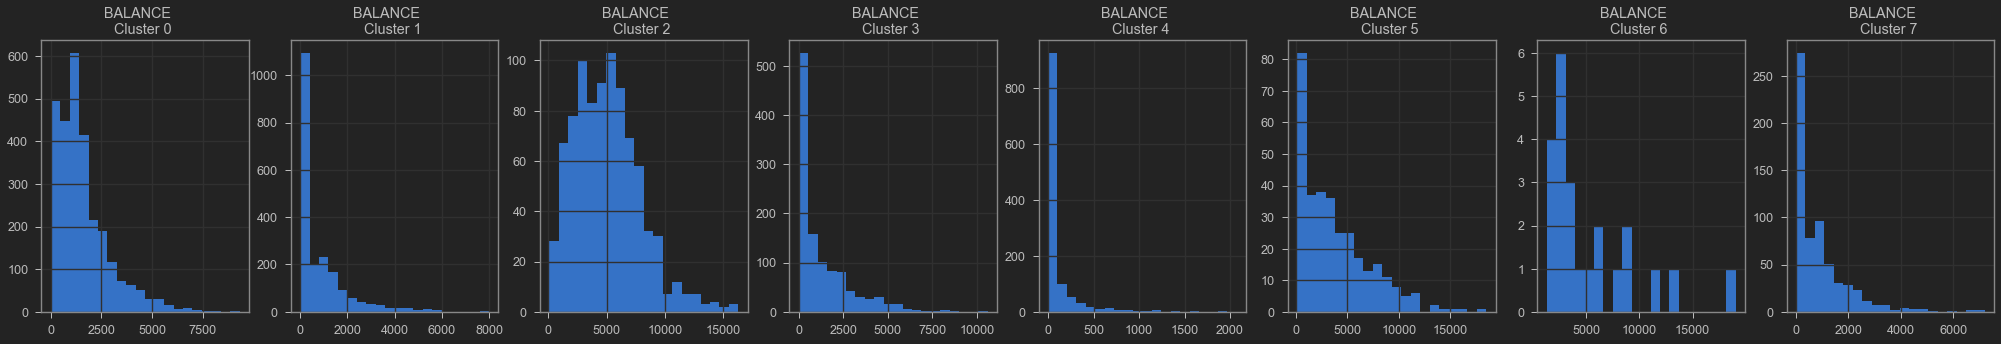

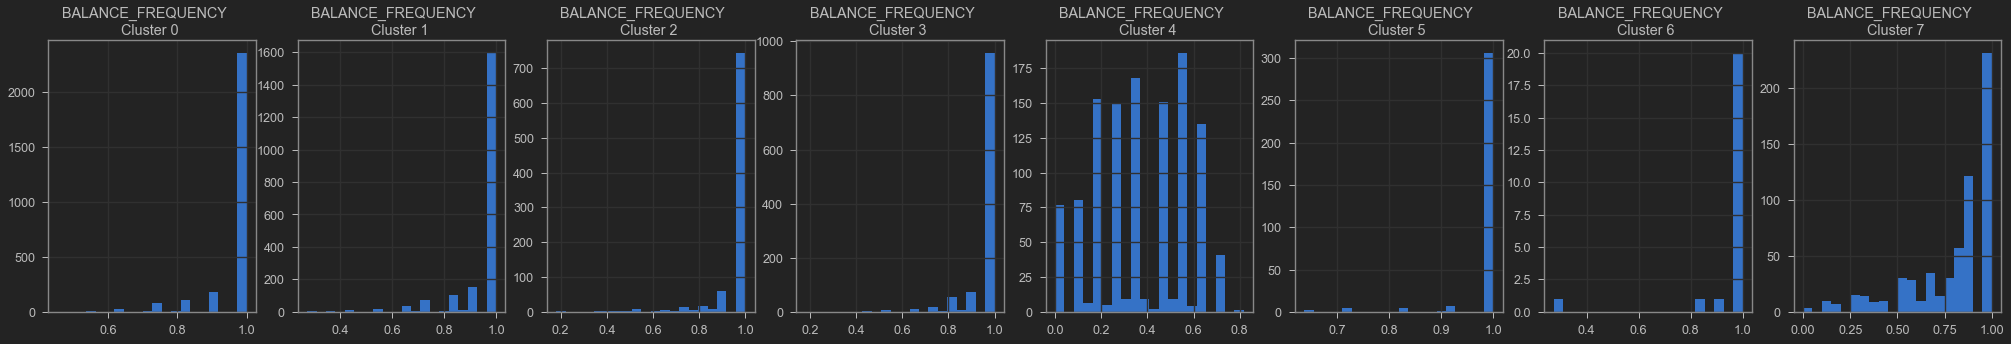

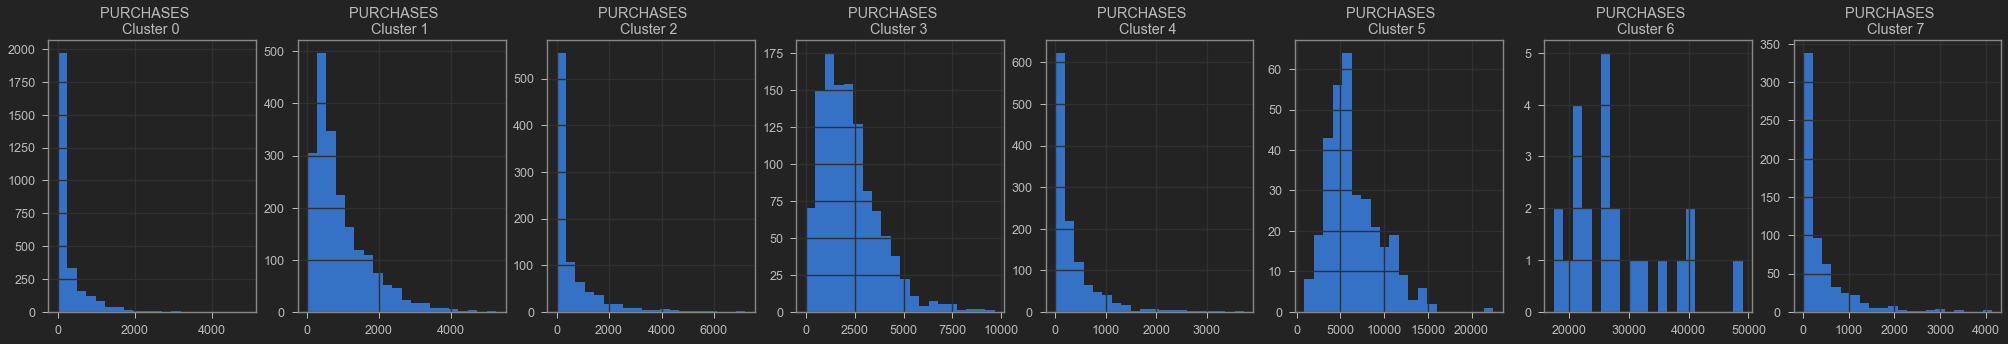

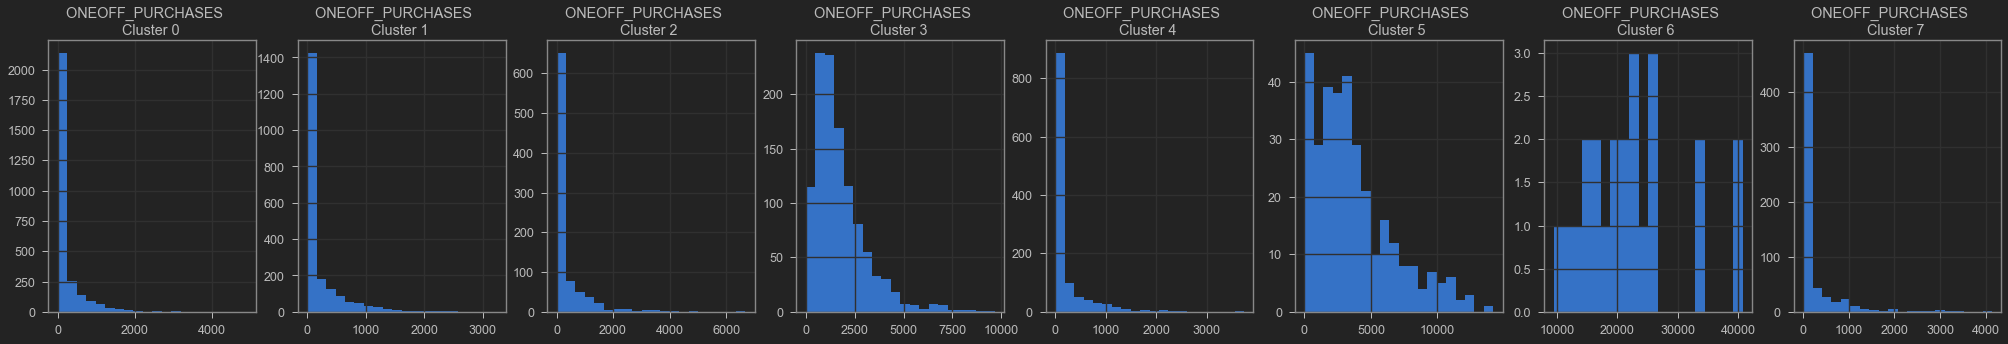

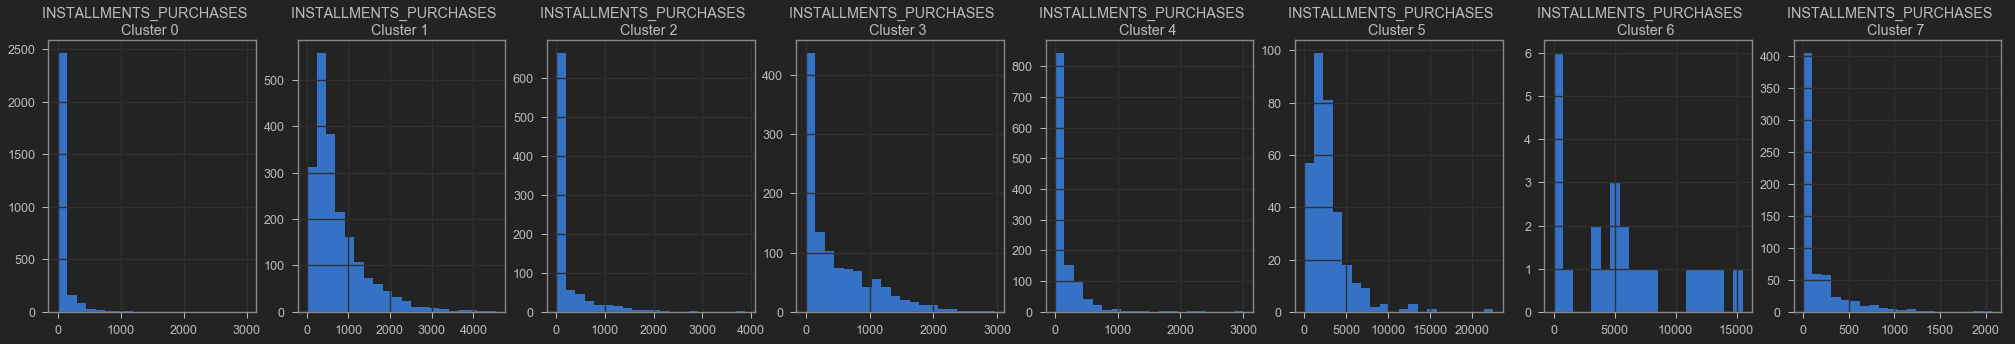

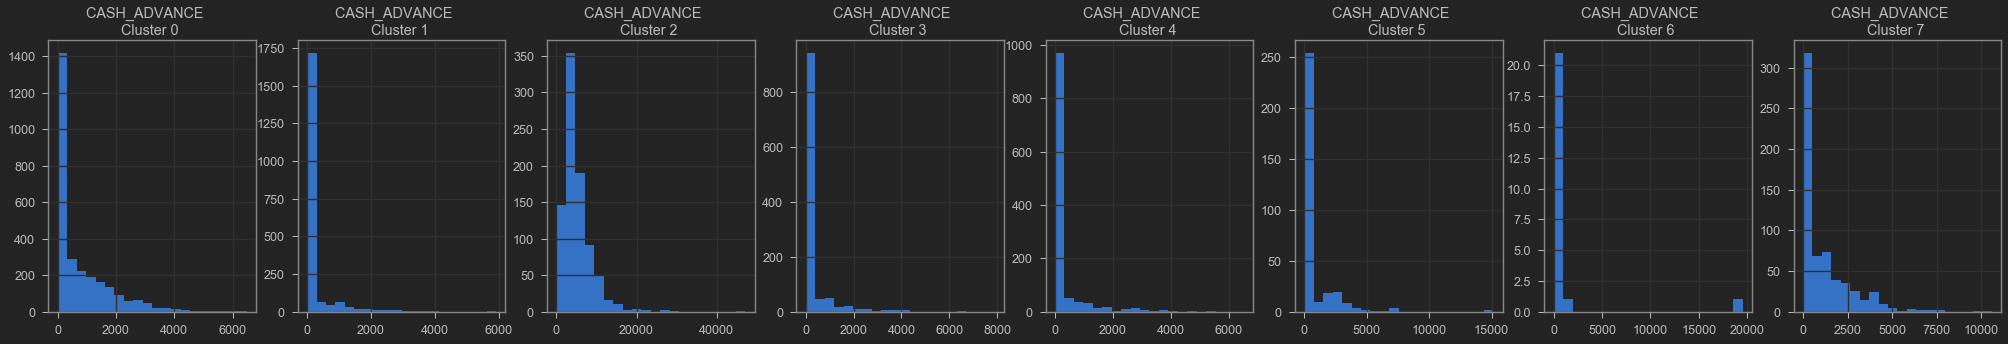

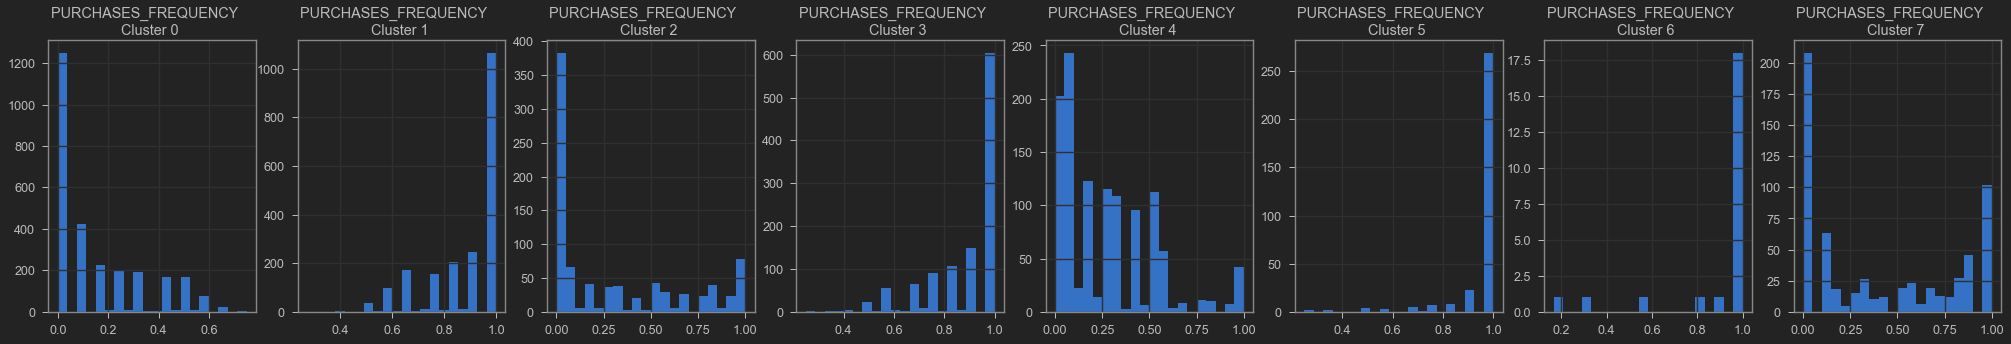

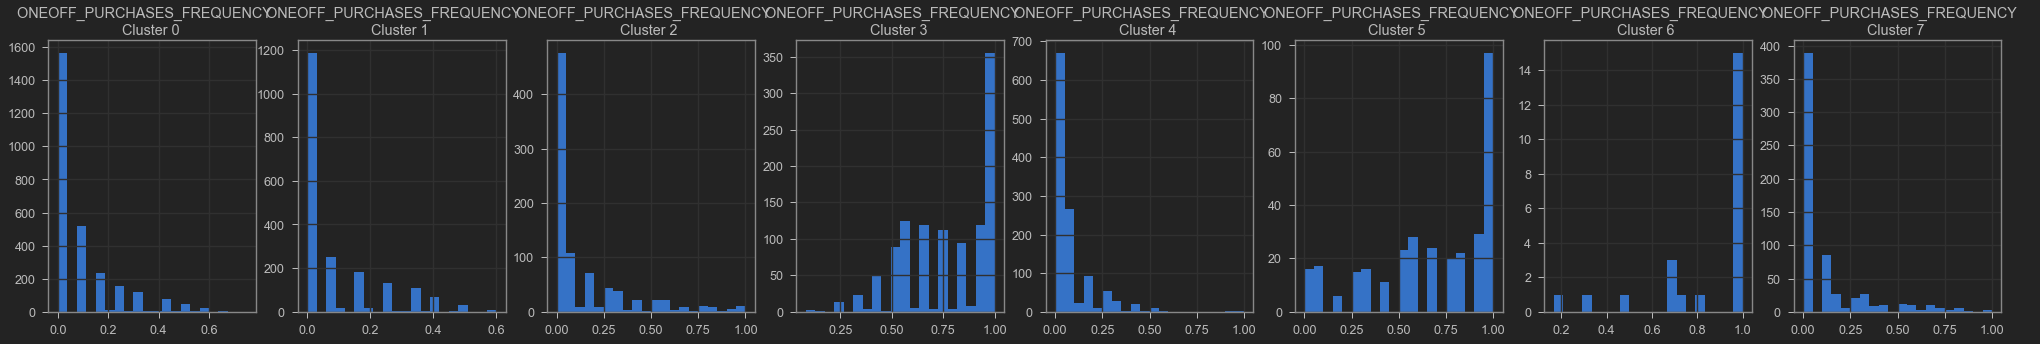

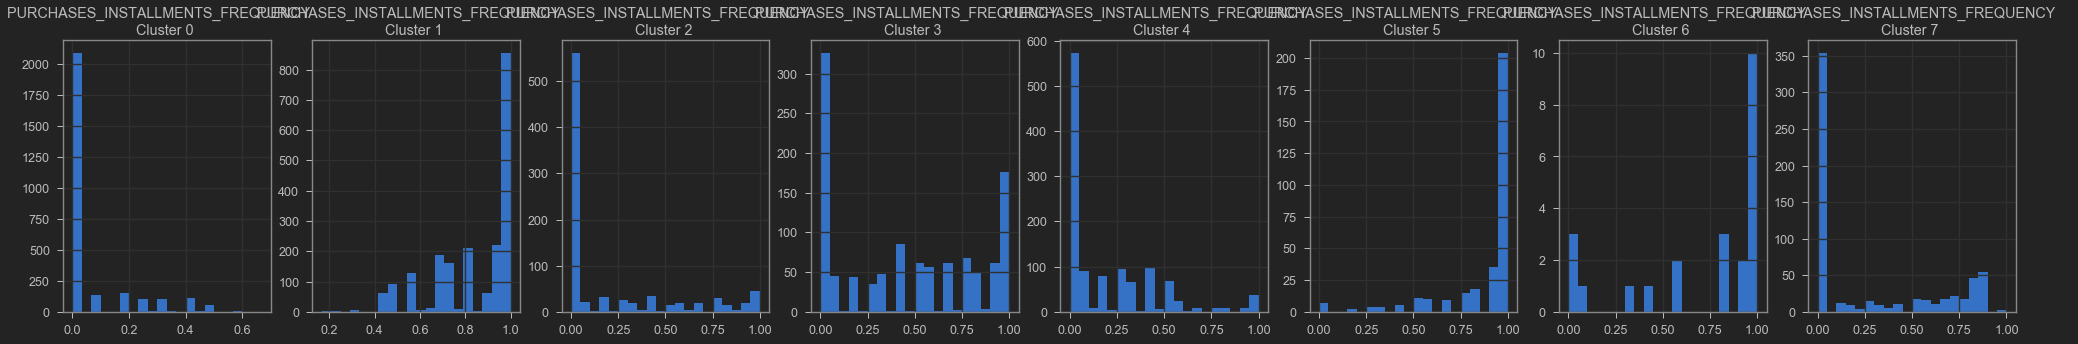

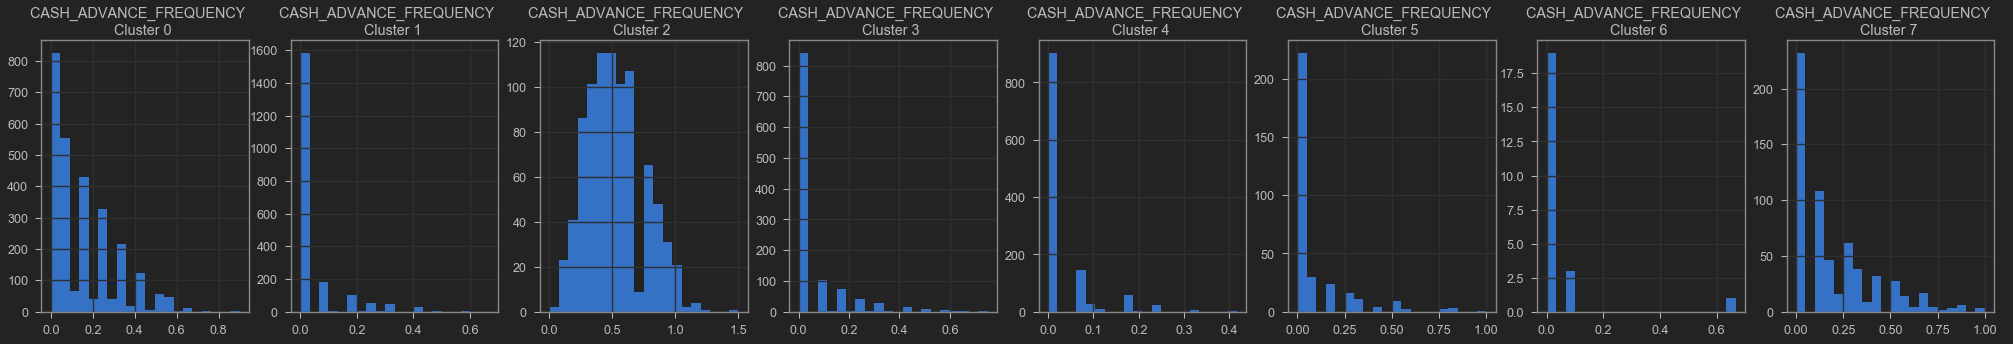

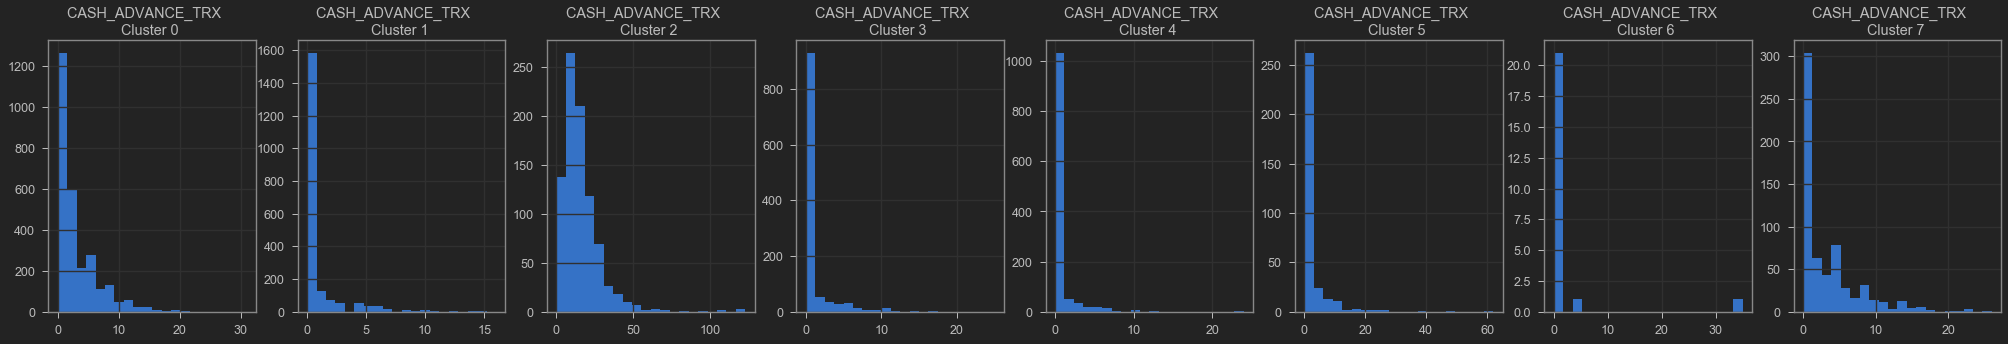

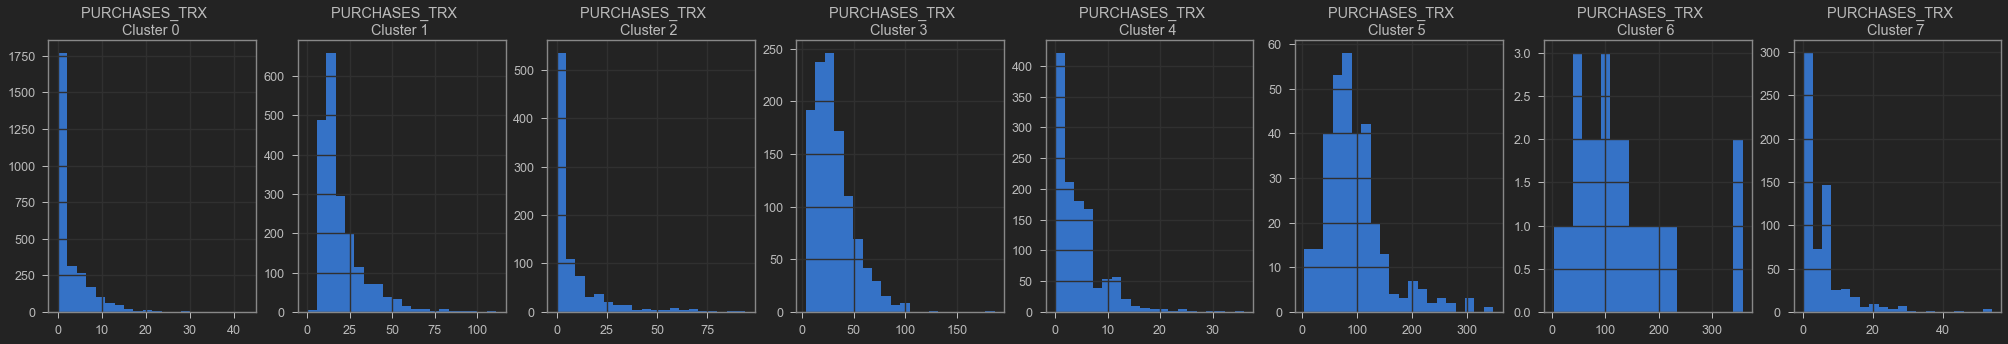

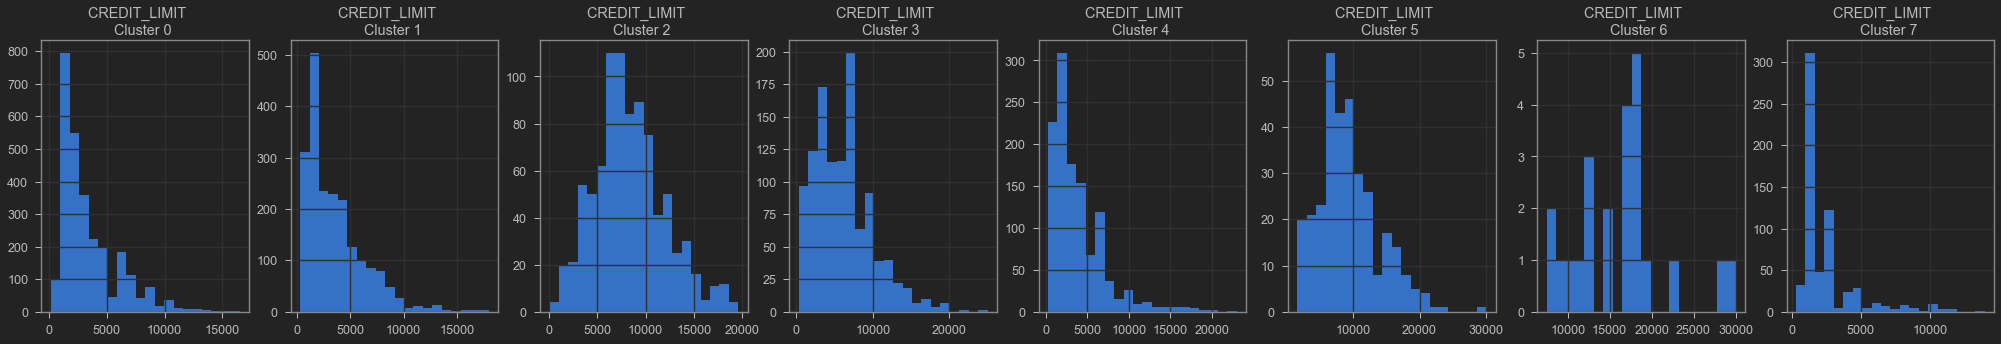

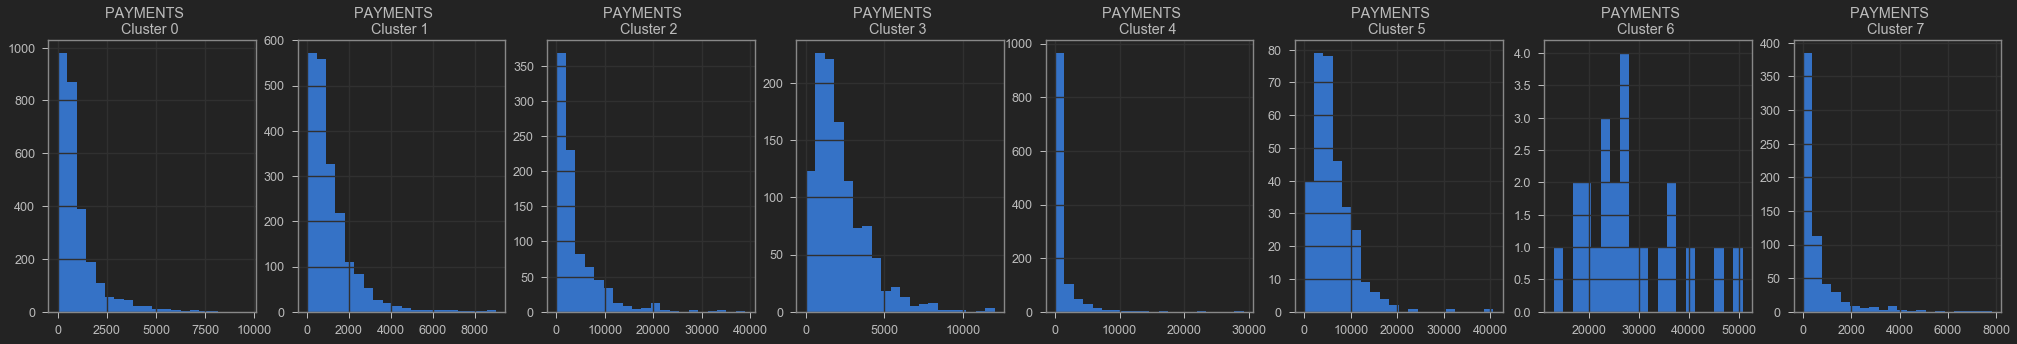

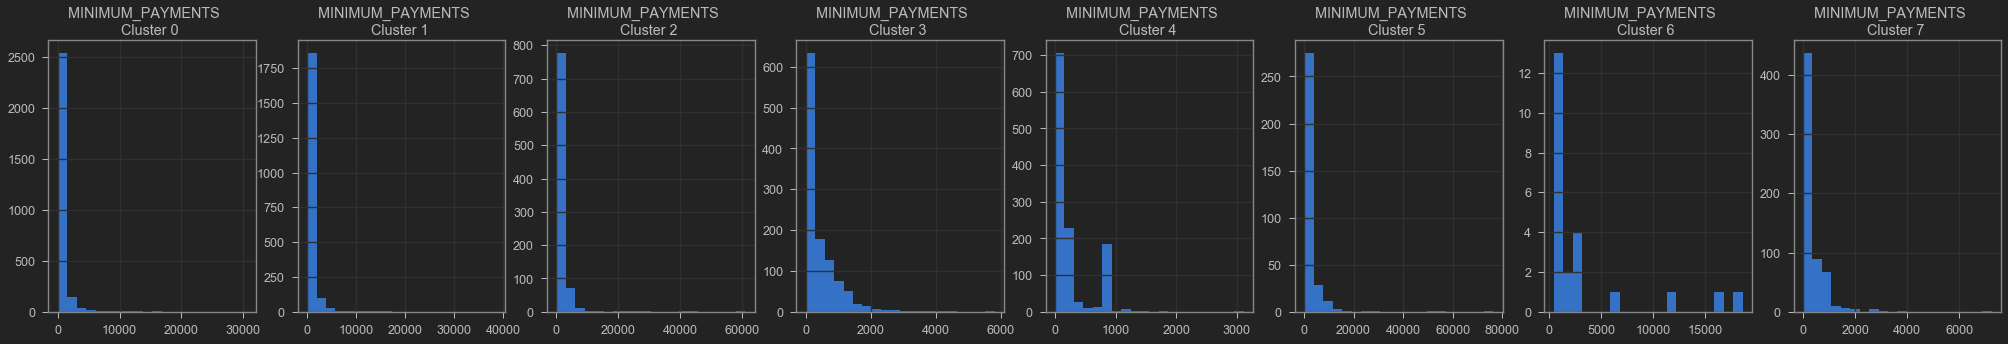

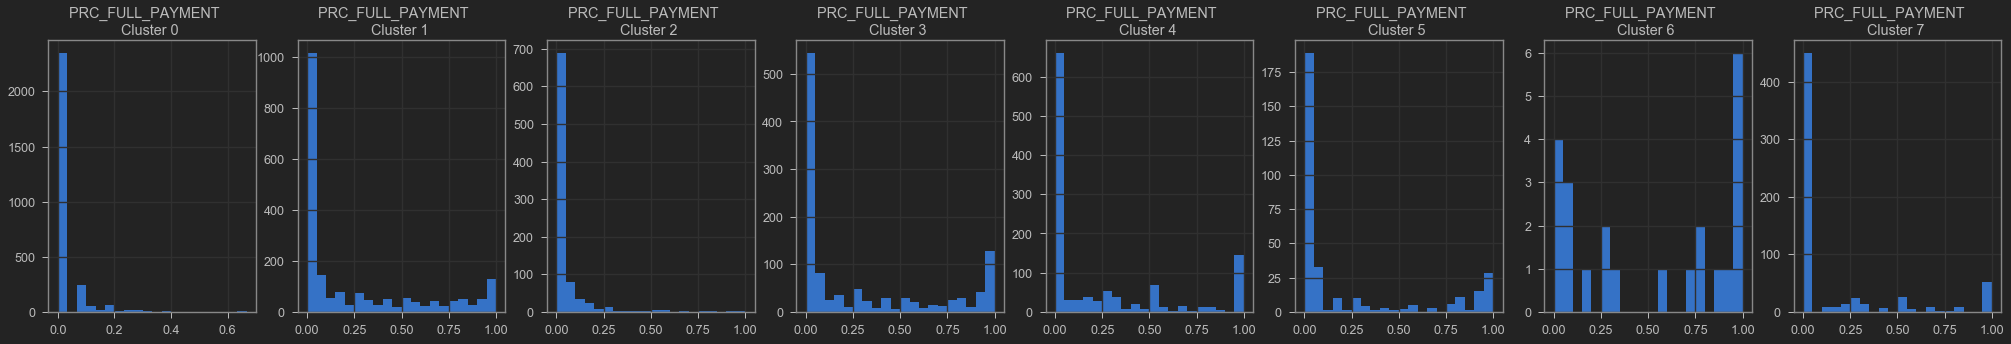

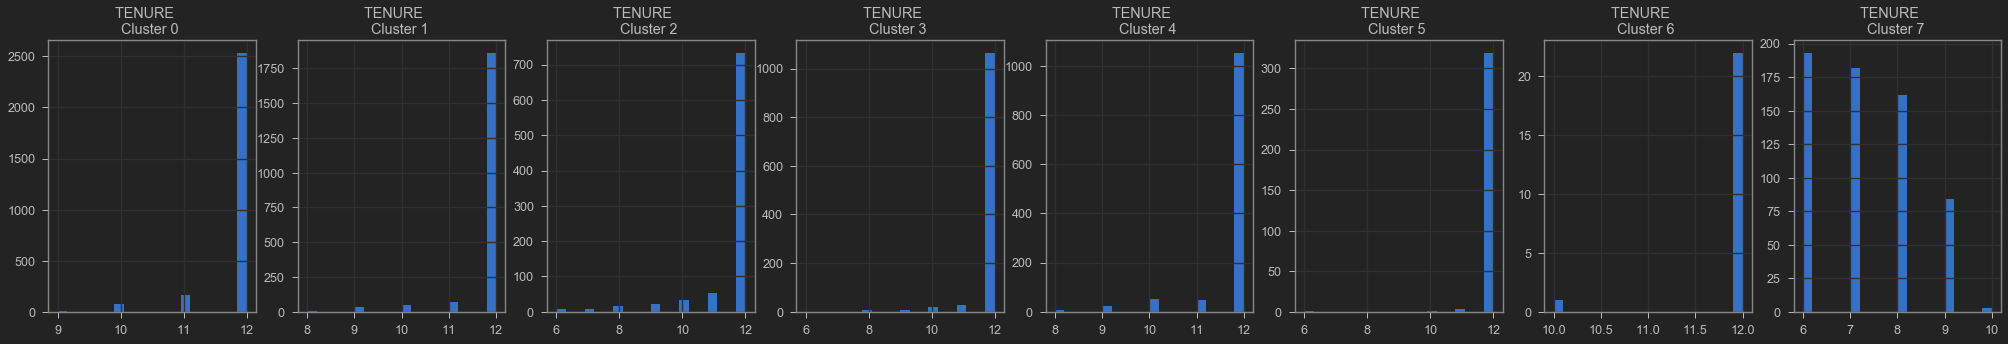

In [54]:
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

In [55]:
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222036, -1.07645548],
       [-1.13829726,  2.50646649],
       [ 0.96968281, -0.38351165],
       ...,
       [-0.92620247, -1.81078829],
       [-2.33654995, -0.65796904],
       [-0.55642197, -0.40045637]])

In [56]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

pca1      pca2
0 -1.682220 -1.076455
1 -1.138297  2.506466
2  0.969683 -0.383512
3 -0.873629  0.043161
4 -1.599433 -0.688585

In [57]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.682220 -1.076455        0
1 -1.138297  2.506466        2
2  0.969683 -0.383512        3
3 -0.873629  0.043161        0
4 -1.599433 -0.688585        0

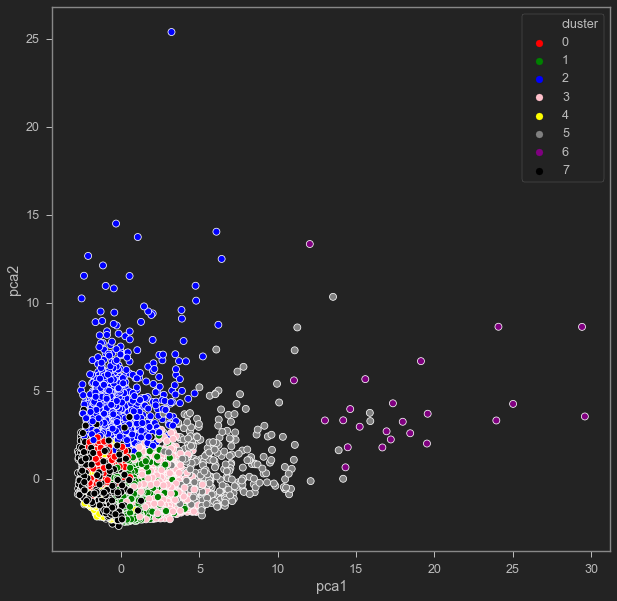

In [59]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

In [ ]:
##MINI CHALLLENGE WITH 4 CLUSTERS

In [61]:
kmeans = KMeans(4)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [62]:
kmeans.cluster_centers_.shape

(4, 17)

In [63]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0  0.956884          0.462829  3.125289         2.715577   
1  1.447440          0.385168 -0.239705        -0.169113   
2 -0.268297         -0.372093 -0.342807        -0.230178   
3 -0.321439          0.243323  0.109302         0.001139   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0               2.400884    -0.139334            1.136663   
1              -0.256176     1.672341           -0.513058   
2              -0.387484    -0.185528           -0.796330   
3               0.256124    -0.366313            0.984230   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   1.800787                         1.067218   
1                  -0.219784                        -0.456251   
2                  -0.388843                        -0.713262   
3                   0.317745                         0.874392   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.309808        -0.157980      3.001253     1.433772   
1               1.738353         1.607015     -0.288815     0.826051   
2              -0.106434        -0.168803     -0.474522    -0.335067   
3              -0.462472        -0.360235      0.297250    -0.077263   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0  1.923476         0.477523         0.453007  0.324229  
1  0.594807         0.485511        -0.406235 -0.098402  
2 -0.263261        -0.119865        -0.257978 -0.052339  
3 -0.138297        -0.091707         0.394901  0.057564

In [64]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0  3556.148177          0.986911  7680.432073      5099.738293   
1  4577.199684          0.968513   491.071544       311.745004   
2  1006.036966          0.789125   270.792195       210.389801   
3   895.426332          0.934912  1236.730523       594.327905   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0            2582.157195   686.680975            0.946548   
1             179.410495  4485.847516            0.284436   
2              60.670225   589.809440            0.170745   
3             642.676996   210.695779            0.885369   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.739667                         0.788577   
1                   0.136892                         0.183111   
2                   0.086458                         0.080969   
3                   0.297247                         0.711943   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.073149         2.170732     89.309756  9711.097561   
1               0.483006        14.215524      7.530966  7499.962465   
2               0.113846         2.096872      2.914985  3275.340006   
3               0.042599         0.790490     22.098366  4213.334399   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0  7301.419079      1977.054411         0.286211  11.951220  
1  3455.052828      1995.669235         0.034898  11.385632  
2   971.028536       584.866867         0.078261  11.447275  
3  1332.787389       650.486936         0.269216  11.594354

In [65]:
labels.shape

(8950,)

In [66]:
labels.max()

3

In [67]:
labels.min()

0

In [68]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([1, 3, 0, ..., 0, 1, 1])

In [69]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        2  
1  4103.032597       1072.340217          0.222222      12        1  
2   622.066742        627.284787          0.000000      12        3  
3     0.000000        864.206542          0.000000      12        2  
4   678.334763        244.791237          0.000000      12        2

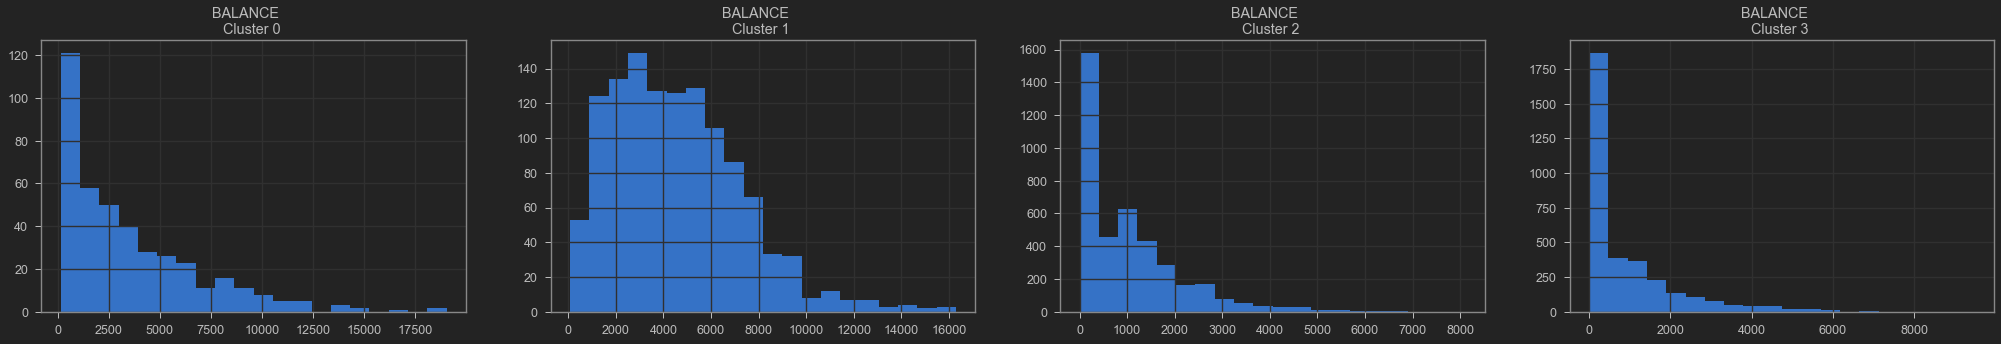

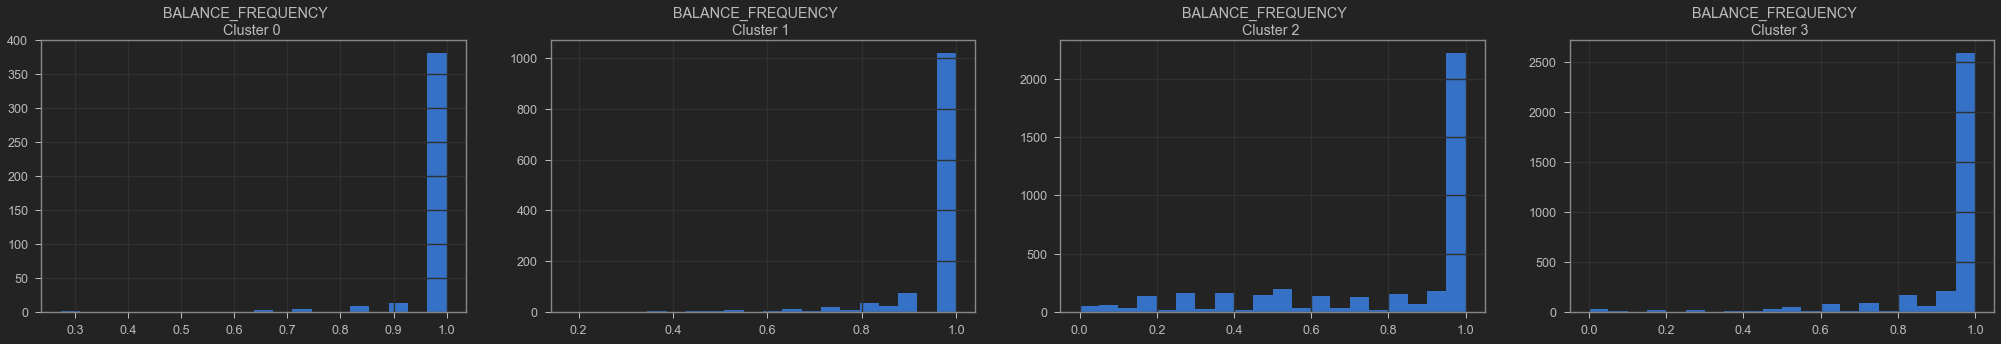

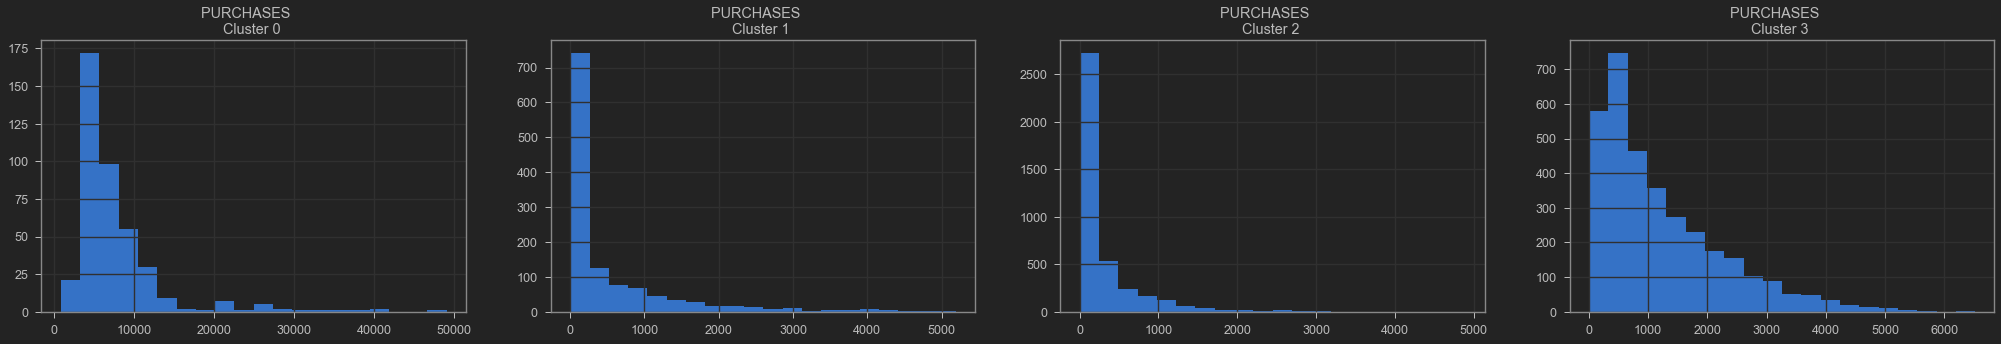

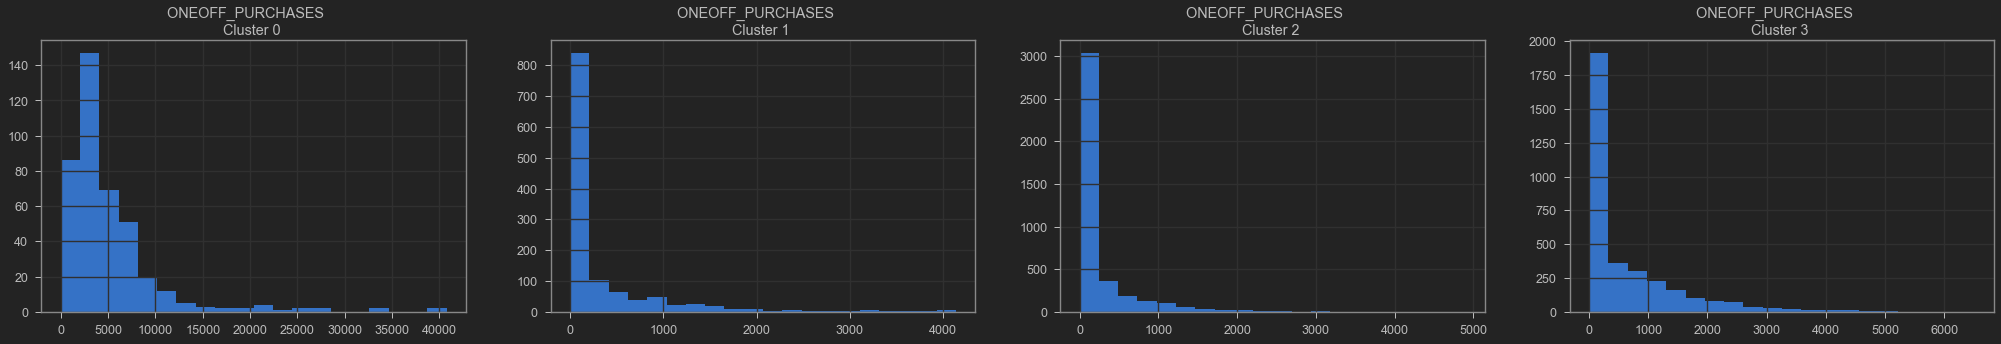

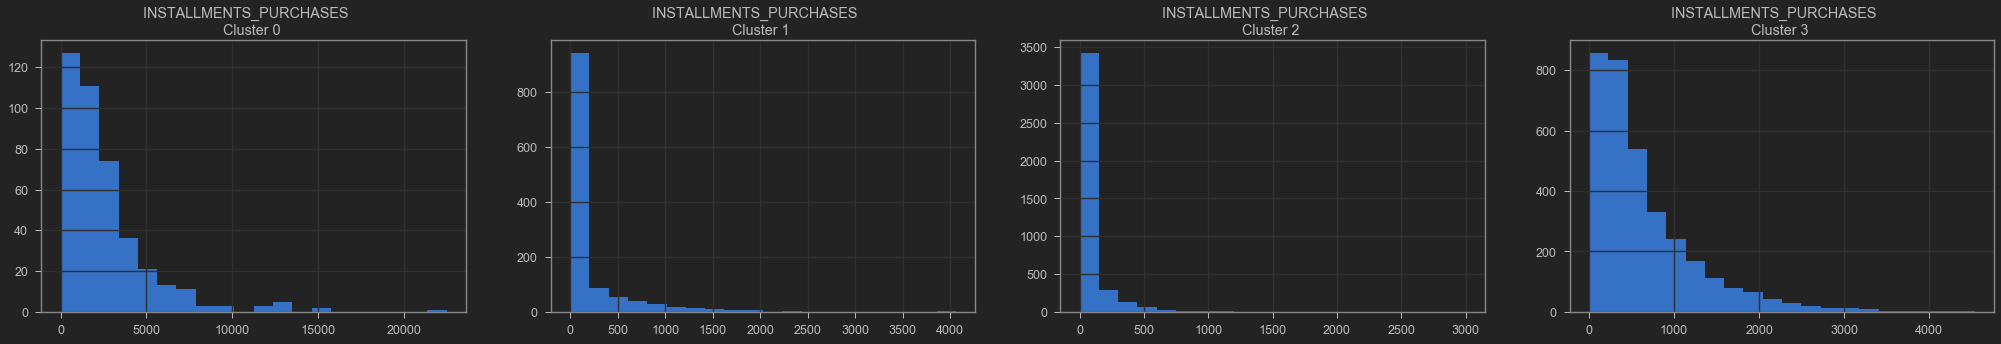

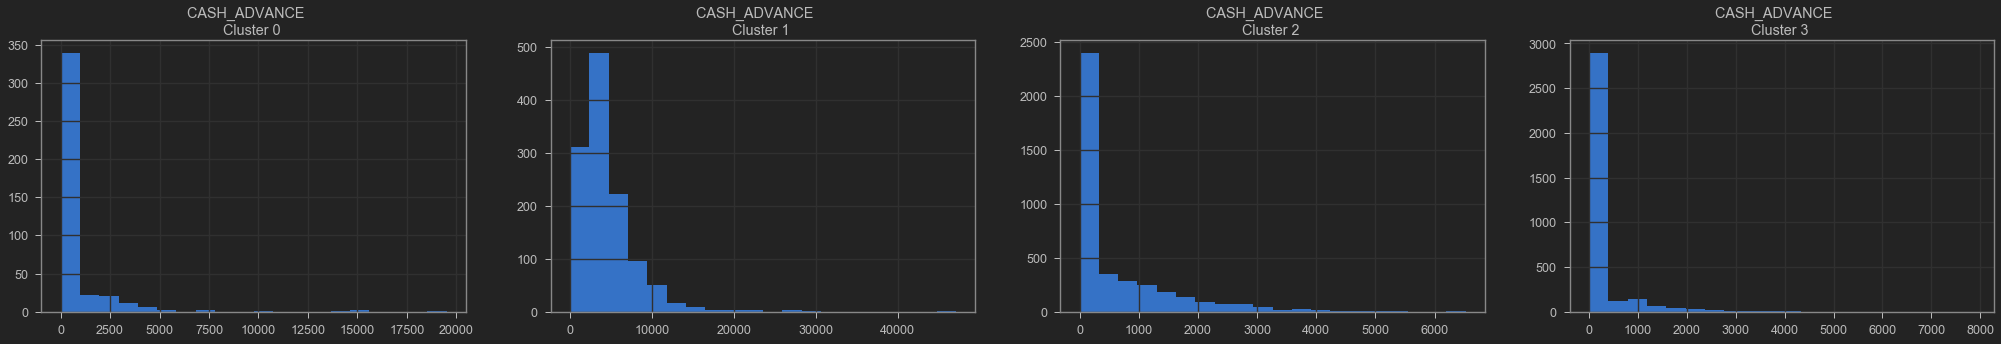

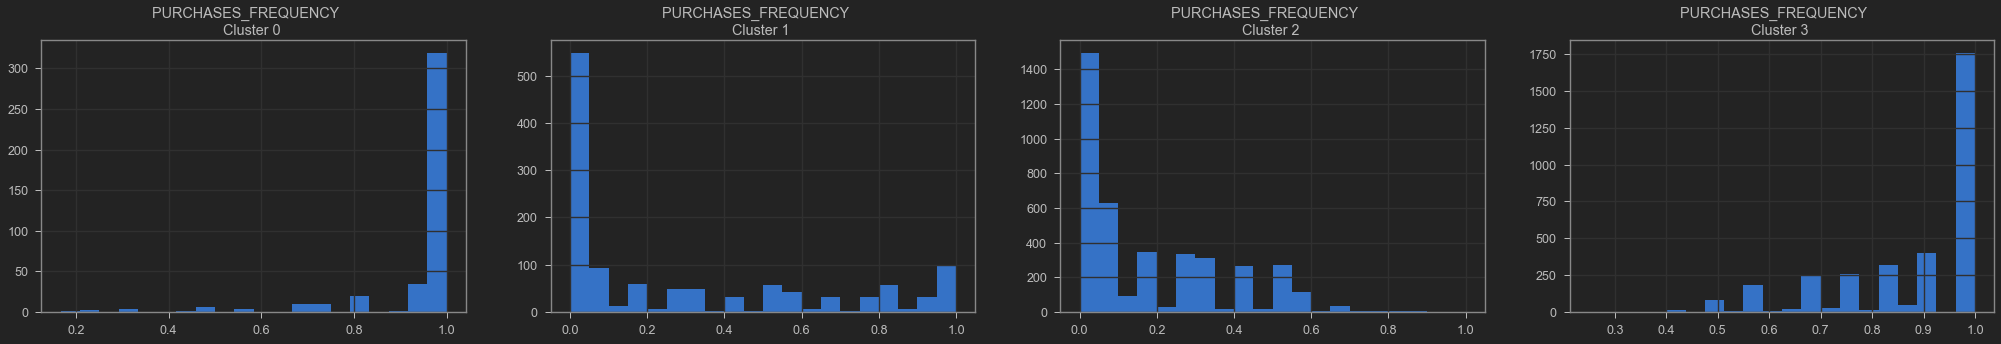

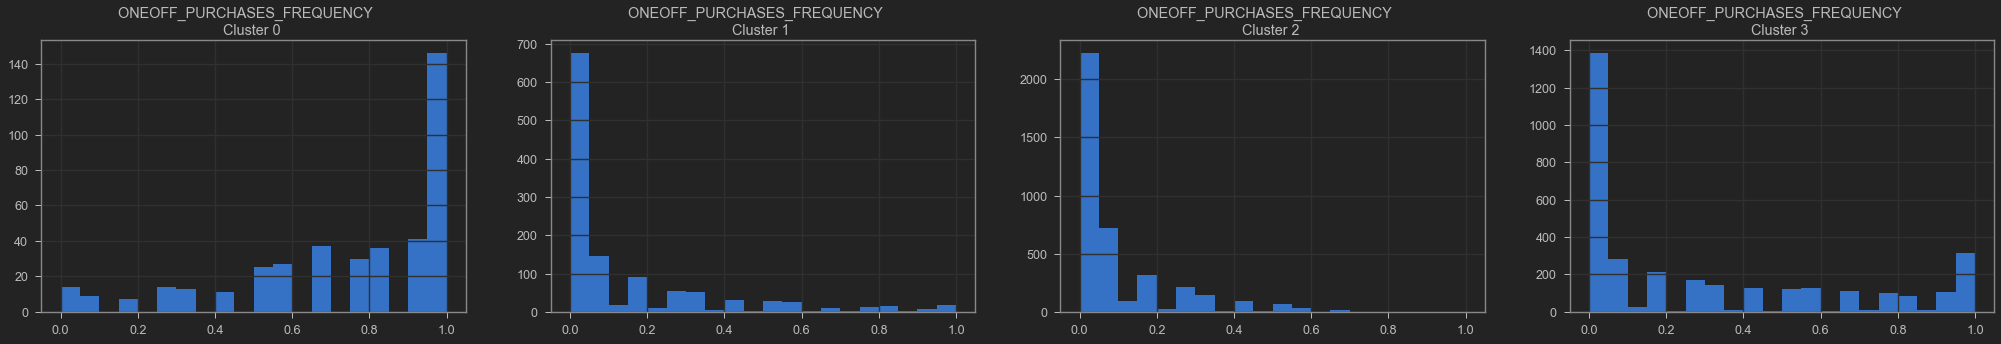

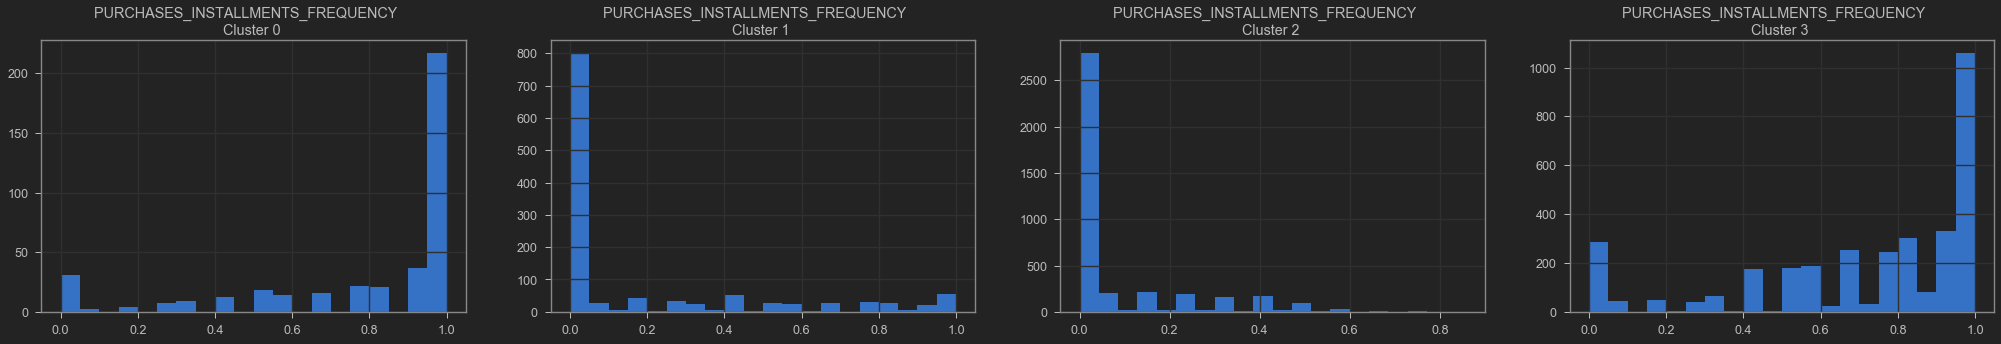

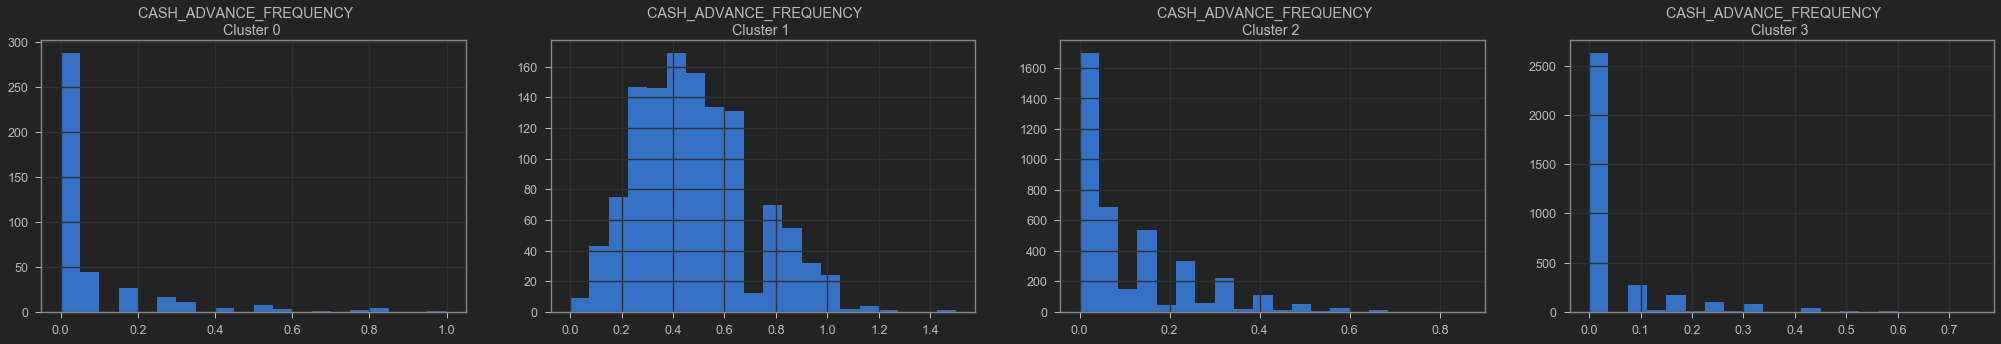

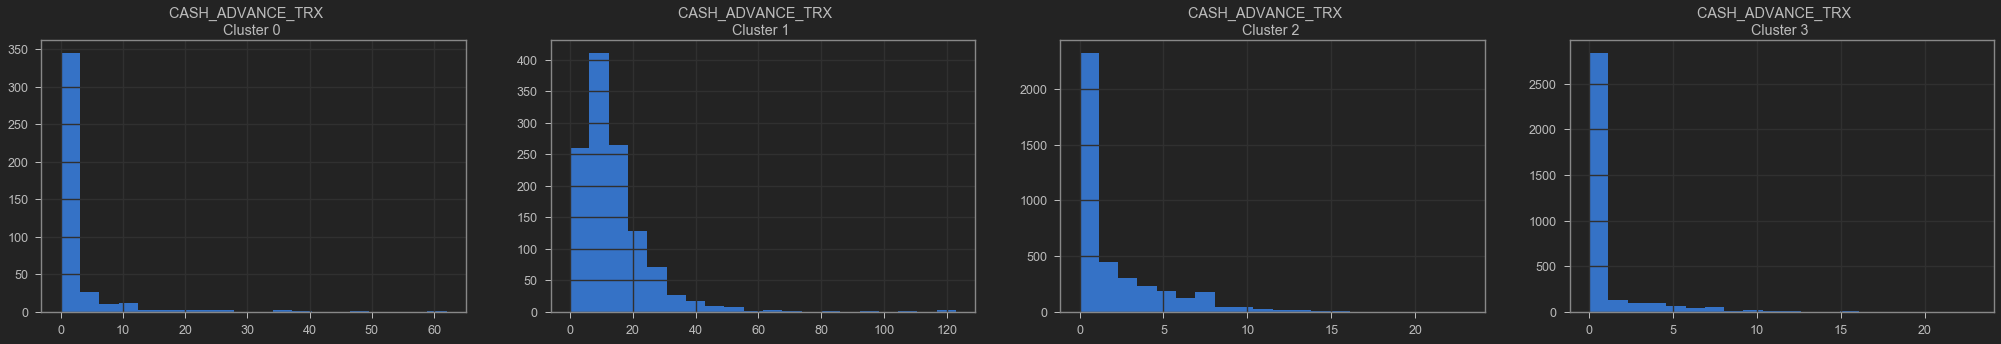

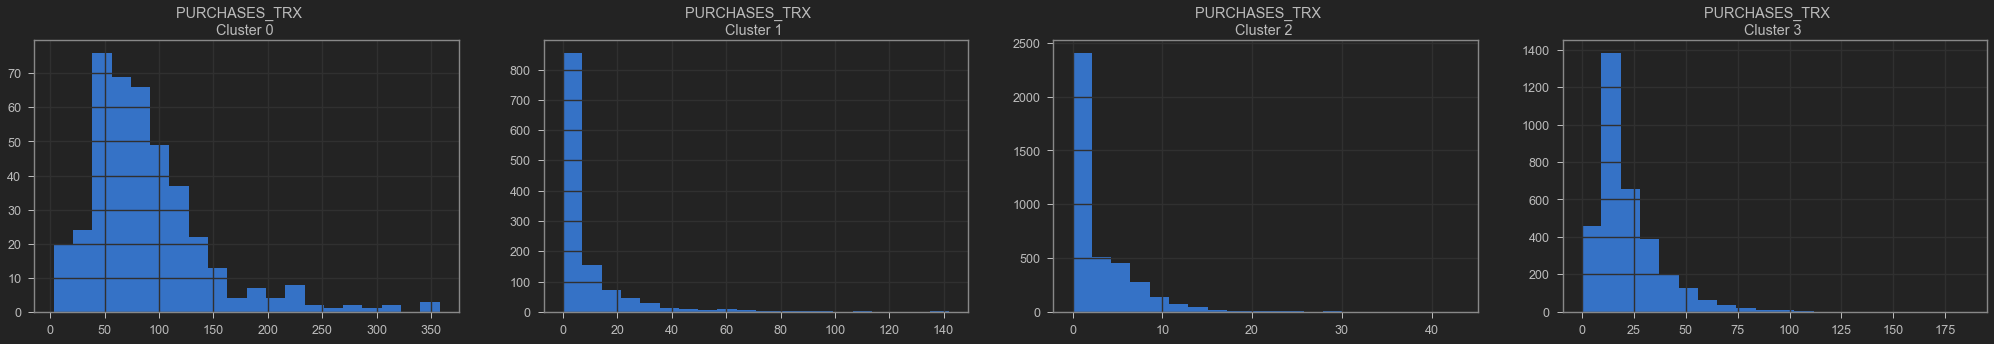

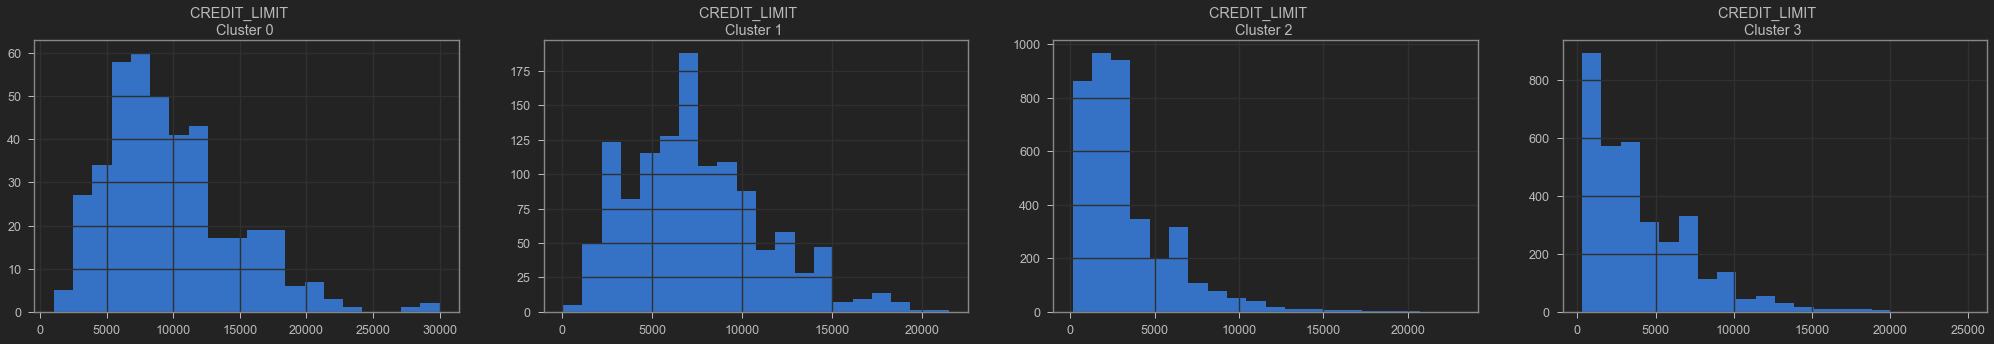

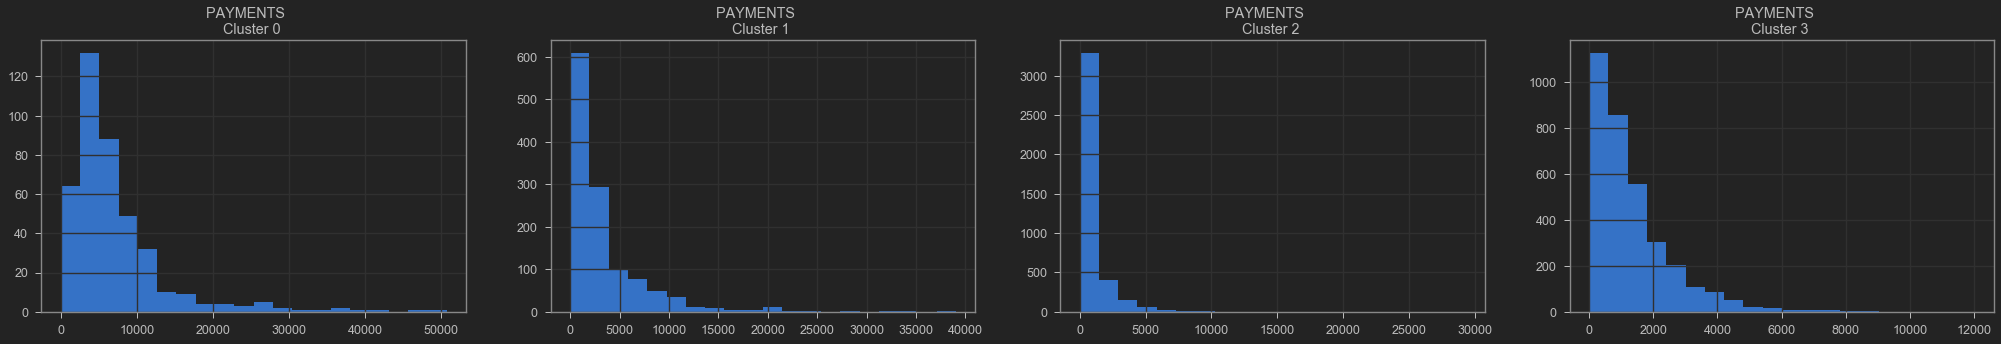

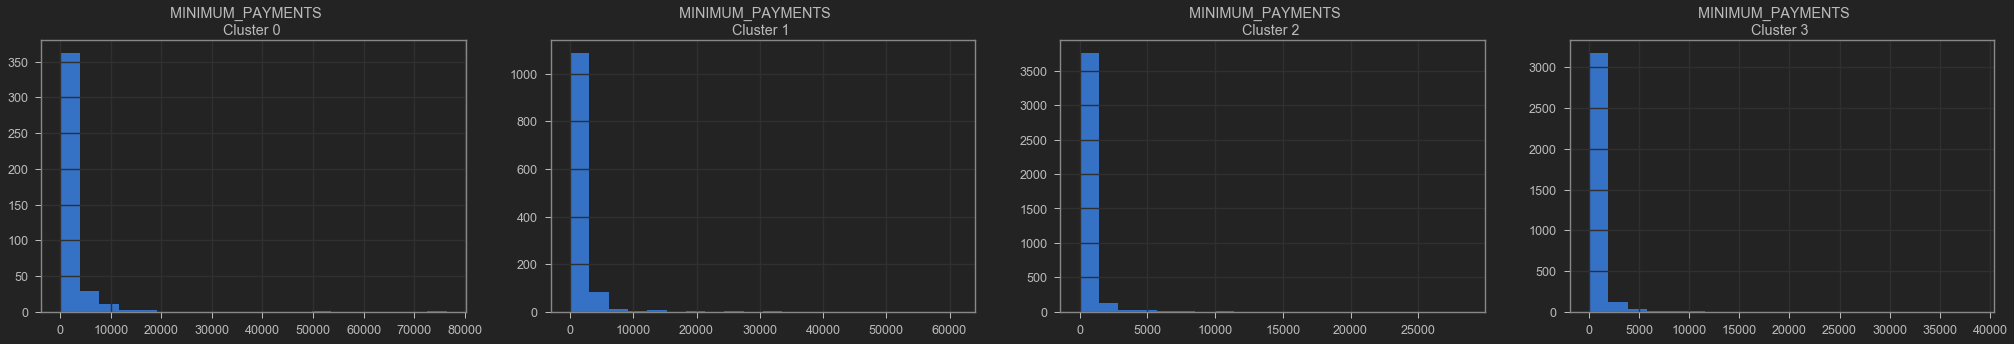

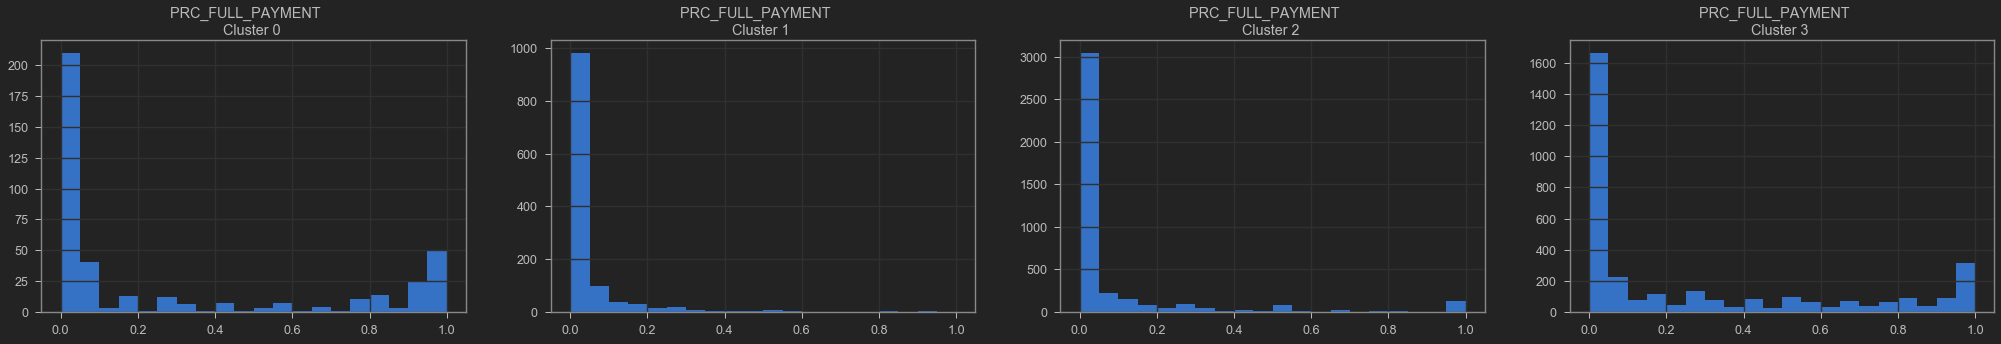

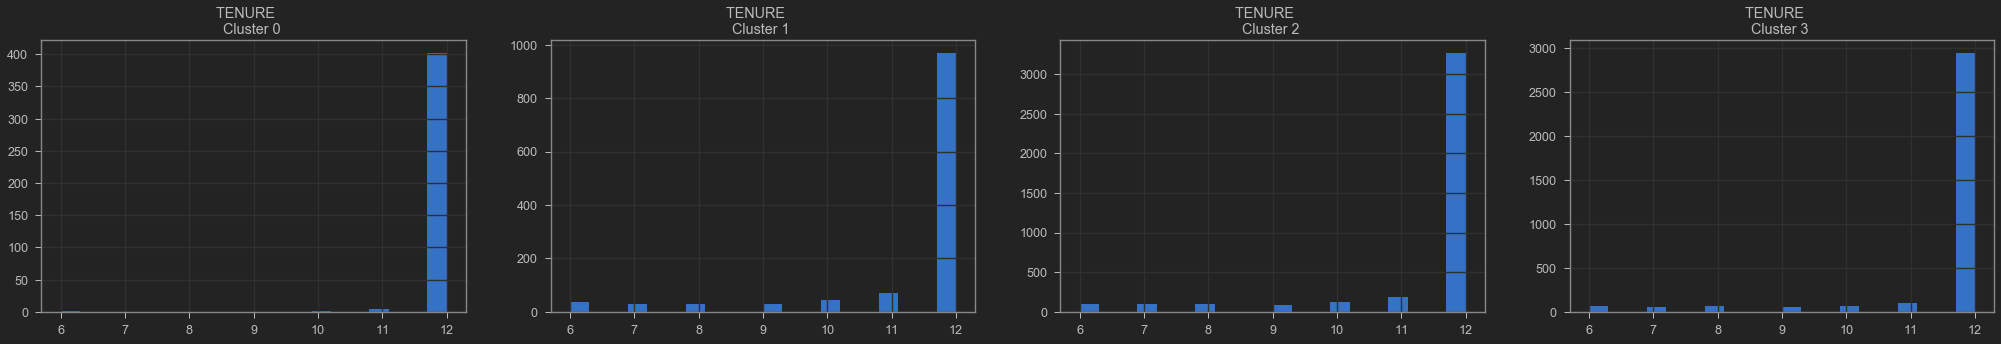

In [71]:
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(4):
    plt.subplot(1,4,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

In [72]:
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222068, -1.07644941],
       [-1.13829819,  2.50648219],
       [ 0.96969196, -0.38353039],
       ...,
       [-0.9262033 , -1.81078582],
       [-2.33655243, -0.6579654 ],
       [-0.55641941, -0.4004724 ]])

In [73]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

pca1      pca2
0 -1.682221 -1.076449
1 -1.138298  2.506482
2  0.969692 -0.383530
3 -0.873630  0.043169
4 -1.599434 -0.688580

In [74]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.682221 -1.076449        2
1 -1.138298  2.506482        1
2  0.969692 -0.383530        3
3 -0.873630  0.043169        2
4 -1.599434 -0.688580        2

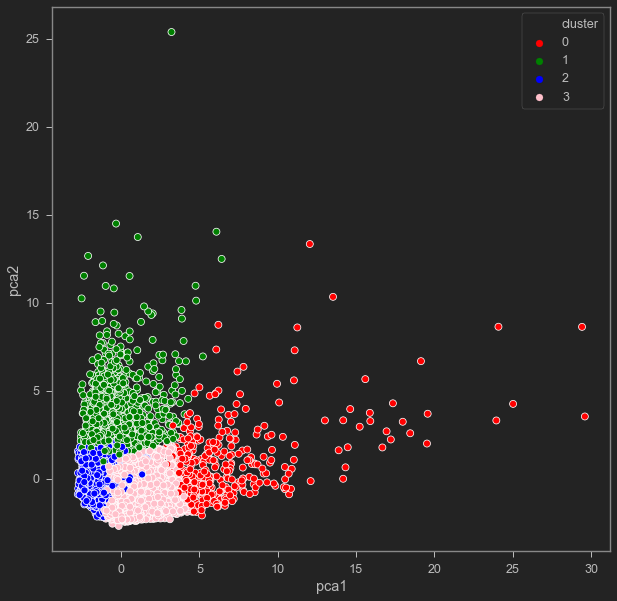

In [75]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink'])
plt.show()

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS

MINI CHALLENGE SOLUTIONS

MINI CHALLENGE #1

In [ ]:
# Average, minimum and maximum balance amounts
print('The average, minimum and maximum balance amount are:', creditcard_df['BALANCE'].mean(), creditcard_df['BALANCE'].min(), creditcard_df['BALANCE'].max())

MINI CHALLENGE #2

In [ ]:
# Let's see who made one off purchase of $40761!
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

In [ ]:
creditcard_df['CASH_ADVANCE'].max()

In [ ]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full

creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]


MINI CHALLENGE #3

In [ ]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

MINI CHALLENGE #4

In [ ]:
# Let's drop Customer ID since it has no meaning here 
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)
creditcard_df.head()

MINI CHALLENGE #5

In [ ]:
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

MINI CHALLENGE #6: 
- Which of the following conditions could terminate the K-means clustering algorithm? (choose 2)
    - K-means terminates after a fixed number of iterations is reached  (True)
    - K-means terminates when the number of clusters does not increase between iterations (False)
    - K-means terminates when the centroid locations do not change between iterations (True)


MINI CHALLENGE #7: 

In [ ]:
# code modification
kmeans.fit(creditcard_df_scaled[:,:7])
# optimal number of clusters would be = 5

MINI CHALLENGE #8 & #9:
 - simply change the values requested in the question and rerun the cells